In [ ]:
import numpy as np
import pandas as pd
# import statsmodels.api as sm
import inspect
import seaborn as sns
import matplotlib.pyplot as plt
# from scipy import stats
# from scipy import stats
from scipy.stats import uniform, binom

Bayesian Data Camp Chapter 1:

In [ ]:
#tosses is the list of outcomes:
def get_heads_prob(tosses):
    num_heads = np.sum(tosses)
    #prior: Beta(1,1)
    return np.random.beta(num_heads + 1, len(tosses) - num_heads + 1, 1000)

In [ ]:
# Estimate and plot heads probability based on 1000 tosses with a biased coin
biased_tosses = np.random.binomial(n=1, p=.4, size=1000)
# print(biased_tosses)
heads_prob_biased = get_heads_prob(biased_tosses)
sns.kdeplot(heads_prob_biased, shade=True, label="biased coin")
plt.show()

That's interesting! With no data, each possible value of the heads probabilty is equally likely! That's the Bayesian way of saying 'we don't know'. Having seen a single tails, the model suspects that tails is more likely than heads, but since there is so little data, it is not very sure about it, so other values are possible, too. Having seen 1000 tosses, 5% of them heads, the model is certain: the heads probability is around 5%. You have just witnessed the Bayesian approach at its core: as more data come in, we update our belief about the parameter, and with more data we become more certain about our estimate!

In [ ]:
inspect.getsource(get_heads_prob)

Chapter 2:

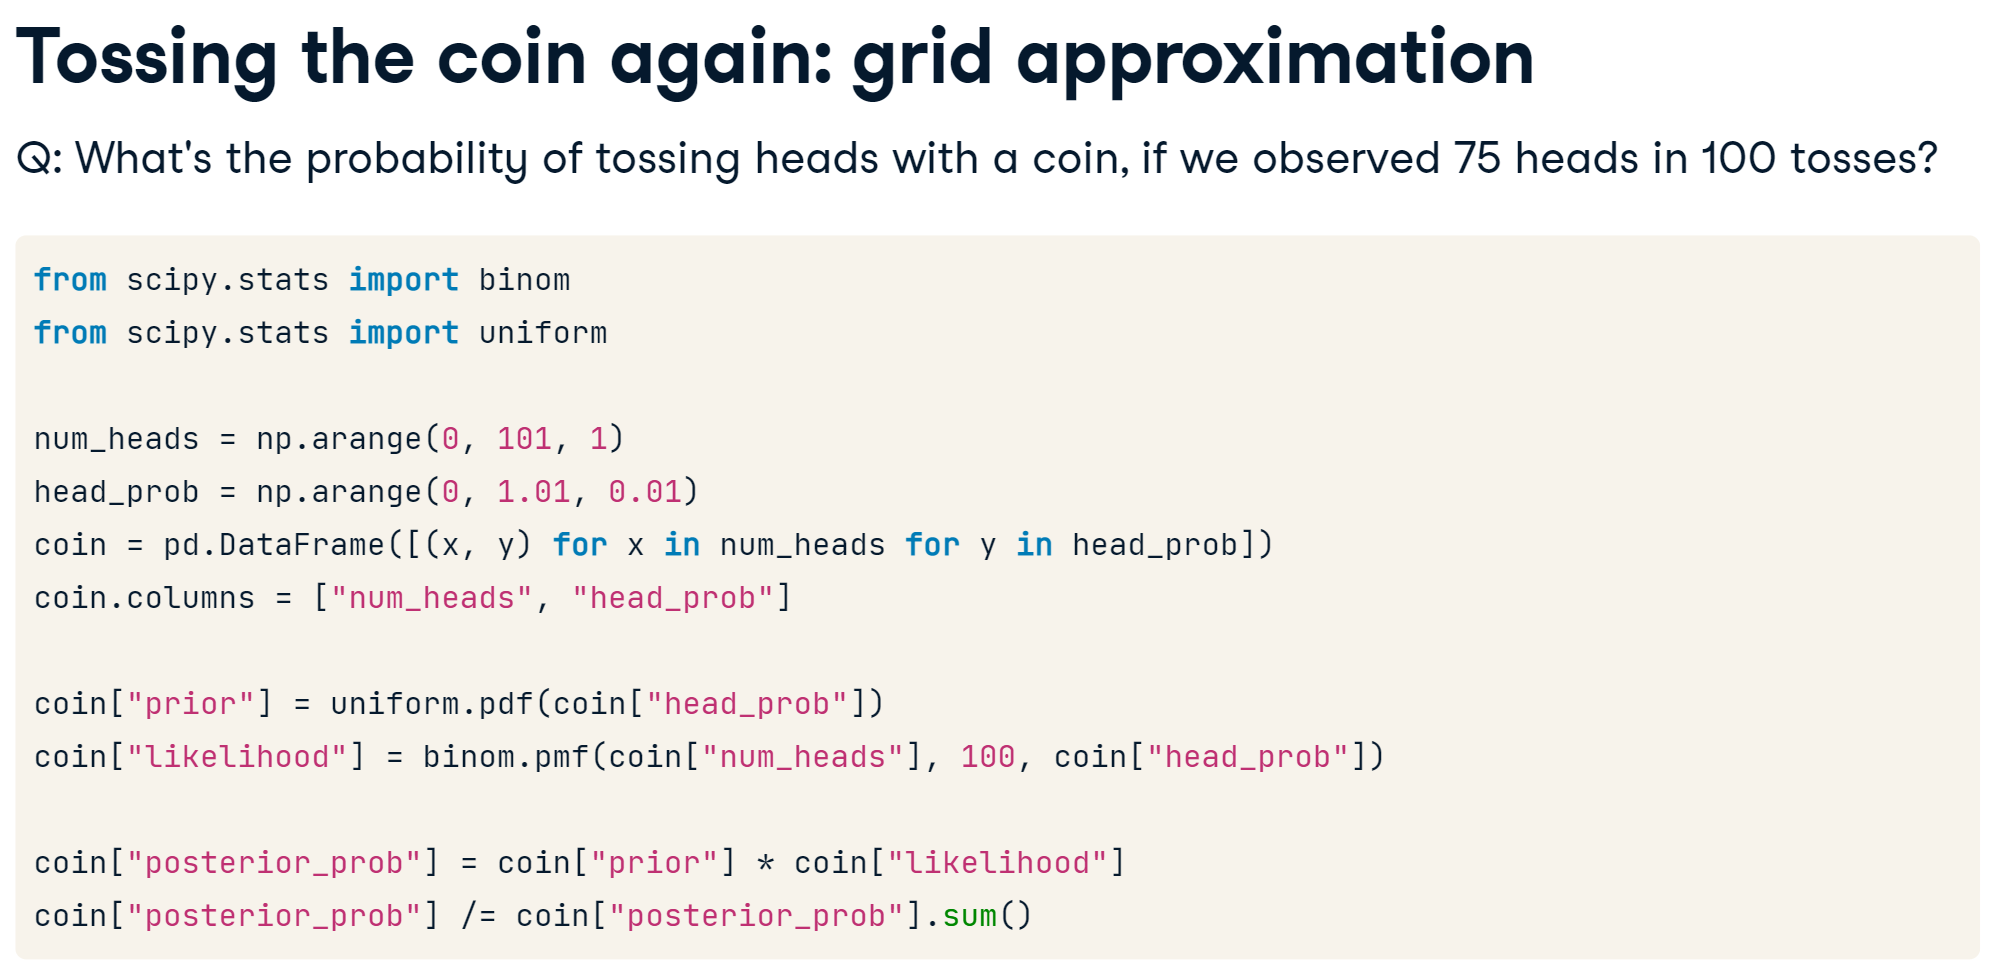

In [ ]:
help('/=')

-------------------------------------------------------------------
Congratulations! You have just been hired as a data analyst at your government's Department of Health. The cabinet is considering the purchase of a brand-new drug against a deadly and contagious virus. There are some doubts, however, regarding how effective the new drug is against the virus. You have been tasked with estimating the drug's efficacy rate, i.e. the percentage of patients cured by the drug.

An experiment was quickly set up in which 10 sick patients have been treated with the drug. Once you know how many of them are cured, you can use the binomial distribution with a cured patient being a "success" and the efficacy rate being the "probability of success". While you are waiting for the experiment's results, you decide to prepare the parameter grid.

numpy and pandas have been imported for you as np and pd, respectively.

In [ ]:
# Create cured patients array from 1 to 10
num_patients_cured = np.arange(0,11)

# Create efficacy rate array from 0 to 1 by 0.01
efficacy_rate = np.arange(0,1.01,0.01)

# Combine the two arrays in one DataFrame
df = pd.DataFrame([(x, y) for x in num_patients_cured for y in efficacy_rate])

# Name the columns
df.columns = ["num_patients_cured", "efficacy_rate"]

# Print df
print(df)

In [ ]:
# Calculate the prior efficacy rate and the likelihood
df["prior"] = uniform.pdf(df["efficacy_rate"])
df["likelihood"] = binom.pmf(df["num_patients_cured"], 10, df["efficacy_rate"])
print(df)

In [ ]:
# Calculate the posterior efficacy rate and scale it to sum up to one
df["posterior_prob"] = df['prior']*df['likelihood']
print(df['posterior_prob'].sum())
print(df)

In [ ]:
df["posterior_prob"] /= df['posterior_prob'].sum()
print(df['posterior_prob'].sum())
print(df)

In [ ]:
# Compute the posterior probability of observing 9 cured patients
df_9_of_10_cured = df.loc[df["num_patients_cured"] == 9]
df_9_of_10_cured["posterior_prob"] /= df_9_of_10_cured["posterior_prob"].sum()

#Plot the drug's posterior efficacy rate
sns.lineplot(df_9_of_10_cured['efficacy_rate'], df_9_of_10_cured['posterior_prob'])
plt.show()

Good job! As we might have expected, observing 9 out of 10 patients cured results in the posterior efficacy rate of 90% being very likely. Notice, however, how much uncertainty there is in the posterior distribution: even the efficacy of 50% is plausible. This is the result of a very small data sample and a great example of how Bayesian parameter estimates incorporate uncertainty!

Updating posterior belief
Well done on estimating the posterior distribution of the efficacy rate in the previous exercise! Unfortunately, due to a small data sample, this distribution is quite wide, indicating much uncertainty regarding the drug's quality. Luckily, testing of the drug continues, and a group of another 12 sick patients have been treated, 10 of whom were cured. We need to update our posterior distribution with these new data!

This is easy to do with the Bayesian approach. We simply need to run the grid approximation similarly as before, but with a different prior. We can use all our knowledge about the efficacy rate (embodied by the posterior distribution from the previous exercise) as a new prior! Then, we recompute the likelihood for the new data, and get the new posterior!

In [ ]:
# Assign old posterior to new prior and calculate likelihood
df["new_prior"] = df["posterior_prob"]
df["new_likelihood"] = binom.pmf(df["num_patients_cured"], 12, df["efficacy_rate"])

# Calculate new posterior and scale it
df["new_posterior_prob"] = df["new_prior"] * df["new_likelihood"]
df["new_posterior_prob"] /= df["new_posterior_prob"].sum()

# Compute the posterior probability of observing 10 cured patients
df_10_of_12_cured = df[df['num_patients_cured']==10]
df_10_of_12_cured["new_posterior_prob"] /= df_10_of_12_cured["new_posterior_prob"].sum()

#Plot the drug's posterior efficacy rate
sns.lineplot(df_10_of_12_cured['efficacy_rate'], df_10_of_12_cured['posterior_prob'])
plt.show()


Updating posterior belief

Well done on estimating the posterior distribution of the efficacy rate in the previous exercise! Unfortunately, due to a small data sample, this distribution is quite wide, indicating much uncertainty regarding the drug's quality. Luckily, testing of the drug continues, and a group of another 12 sick patients have been treated, 10 of whom were cured. We need to update our posterior distribution with these new data!

This is easy to do with the Bayesian approach. We simply need to run the grid approximation similarly as before, but with a different prior. We can use all our knowledge about the efficacy rate (embodied by the posterior distribution from the previous exercise) as a new prior! Then, we recompute the likelihood for the new data, and get the new posterior!



In [ ]:
sns.lineplot(df_10_of_12_cured["efficacy_rate"], 
             df_10_of_12_cured["new_posterior_prob"], 
             label="new posterior")
sns.lineplot(df_9_of_10_cured["efficacy_rate"], 
             df_9_of_10_cured["posterior_prob"], 
             label="old posterior = new prior")
plt.show()

The difference between these two distributions actually reflects what we have learned only from the data on the 12 new patients. The knowledge about the first 10 patients is already encoded in the old posterior, which became the new prior.

Instead of using the old posterior as a new prior, we could have come up with our own prior belief about the efficacy rate in the first place. Let's take a look at it in the upcoming video!

SIMULATING POSTERIOR DRAWS

You have just decided to use a Beta(5, 2) prior for the efficacy rate. You are also using the binomial distribution to model the data (curing a sick patient is a "success", remember?). Since the beta distribution is a conjugate prior for the binomial likelihood, you can simply simulate the posterior!

You know that if the prior is Beta(a,b), then the posterior is Beta(x,y), with:

x = # successes + a
y = # Observations - # successes + b

Can you simulate the posterior distribution? Recall that altogether you have data on 22 patients, 19 of whom have been cured. numpy and seaborn have been imported for you as np and sns, respectively.

In [ ]:
# Define the number of patients treated and cured
num_patients_treated = 22
num_patients_cured = 19

# Simulate 10000 draws from the posterior distribuition
posterior_draws = np.random.beta(num_patients_cured + 5, num_patients_treated - num_patients_cured + 2, 10000)

# Plot the posterior distribution
sns.kdeplot(posterior_draws, shade=True)
plt.show()

Well done! Notice that the posterior distribuion has a slightly longer tail on the left-hand side, allowing for efficacy rates as small as 50%, even though in your data you observe 86% (19 out of 22). This is the impact of the prior: you learn not only from your own small data, but also from other countries' experience! Now that you know how obtain posterior distributions of the parameters, let's talk about how to report these results!

REPORTING BAYESIAN RESULTS

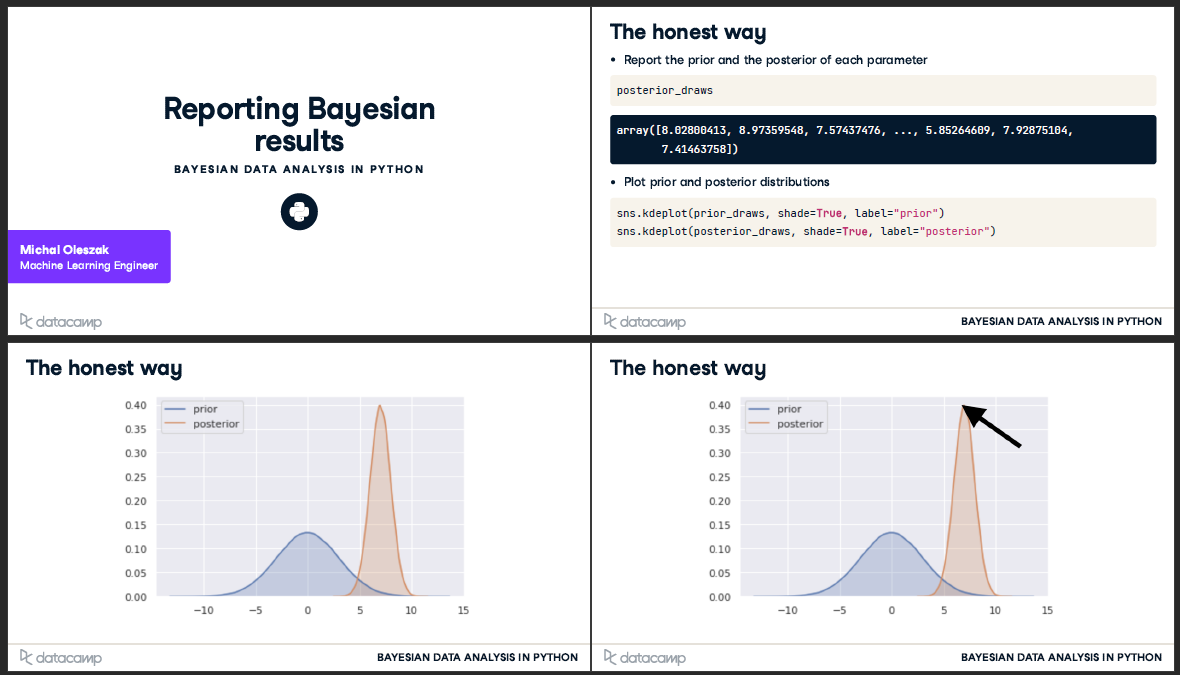
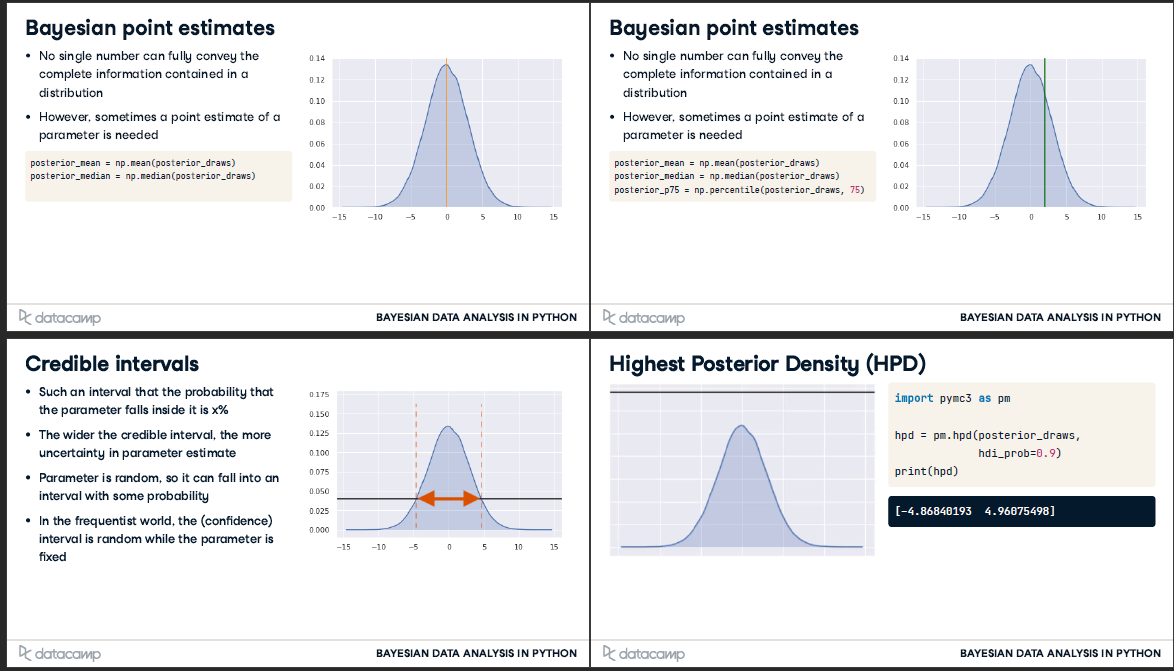

In [ ]:
drug_efficacy_posterior_draws = posterior_draws
# Calculate the expected number of people cured
cured_expected = np.mean(drug_efficacy_posterior_draws) * 100000

# Calculate the minimum number of people cured with 50% probability
min_cured_50_perc = np.median(drug_efficacy_posterior_draws) * 100000

# Calculate the minimum number of people cured with 90% probability
min_cured_90_perc = np.percentile(drug_efficacy_posterior_draws, 10) * 100000

# Print the filled-in memo
print(f"Based on the experiments carried out by ourselves and neighboring countries, \nshould we distribute the drug, we can expect {int(cured_expected)} infected people to be cured. \nThere is a 50% probability the number of cured infections \nwill amount to at least {int(min_cured_50_perc)}, and with 90% probability \nit will not be less than {int(min_cured_90_perc)}.")


Great! Your memo compresses the posterior distribution of the drug's efficacy to a couple of useful numbers, certainly helping the secretary decide whether to buy the new drug. However, these numbers convey no information as to how uncertain the estimation is. Let's try quantifying this uncertainty next!

Highest Posterior Density credible intervals

You know that reporting bare point estimates is not enough. It would be great to provide a measure of uncertainty in the drug's efficacy rate estimate, and you have all the means to do so. You decide to add the following to the memo.

The experimental results indicate that with a 90% probability the new drug's efficacy rate is between ___ and ___, and with a 95% probability it is between ___ and ___.

You will need to calculate two credible intervals: one of 90% and another of 95% probability. The drug_efficacy_posterior_draws array is still available in your workspace.

In [ ]:
# Import pymc3 as pm
import pymc3 as pm

# Calculate HPD credible interval of 90%
ci_90 = pm.hpd(drug_efficacy_posterior_draws, hdi_prob=0.9)

# Calculate HPD credible interval of 95%
ci_95 = pm.hpd(drug_efficacy_posterior_draws, hdi_prob=0.95)

# Print the memo
print(f"The experimental results indicate that with a 90% probability \nthe new drug's efficacy rate is between {np.round(ci_90[0], 2)} and {np.round(ci_90[1], 2)}, \nand with a 95% probability it is between {np.round(ci_95[0], 2)} and {np.round(ci_95[1], 2)}.")

Should put out:

    <script.py> output:
    The experimental results indicate that with a 90% probability 
    the new drug's efficacy rate is between 0.72 and 0.94, 
    and with a 95% probability it is between 0.7 and 0.95.

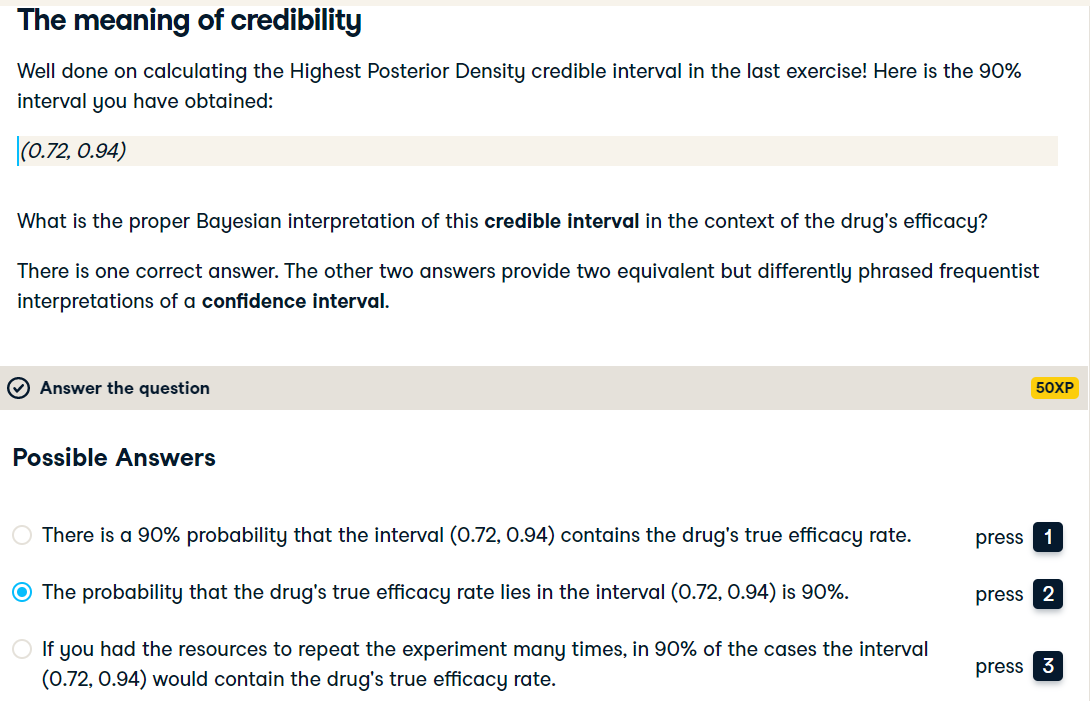

That's the Bayesian interpretation of a credible interval. Since the drug's true efficacy rate is considered a random variable, we can make probabilistic statements about it, as in: "the probability that it takes a particular value or that it lies in a particular interval is X%"

----------------------------------------------------------------------------------------------------------
CHAPTER 3:

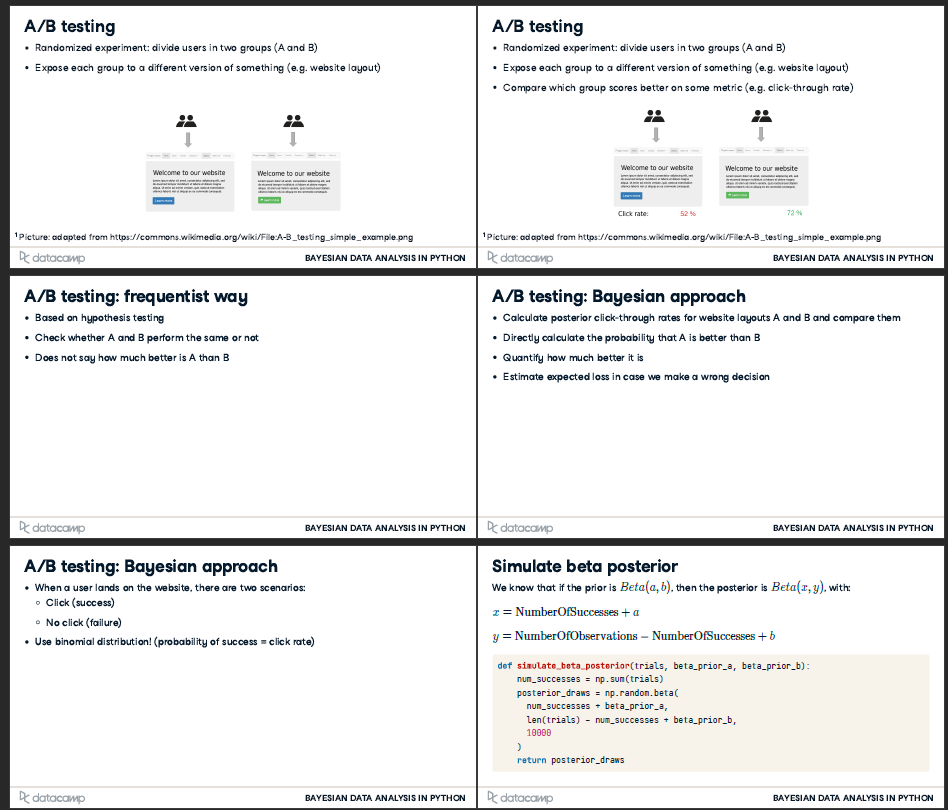
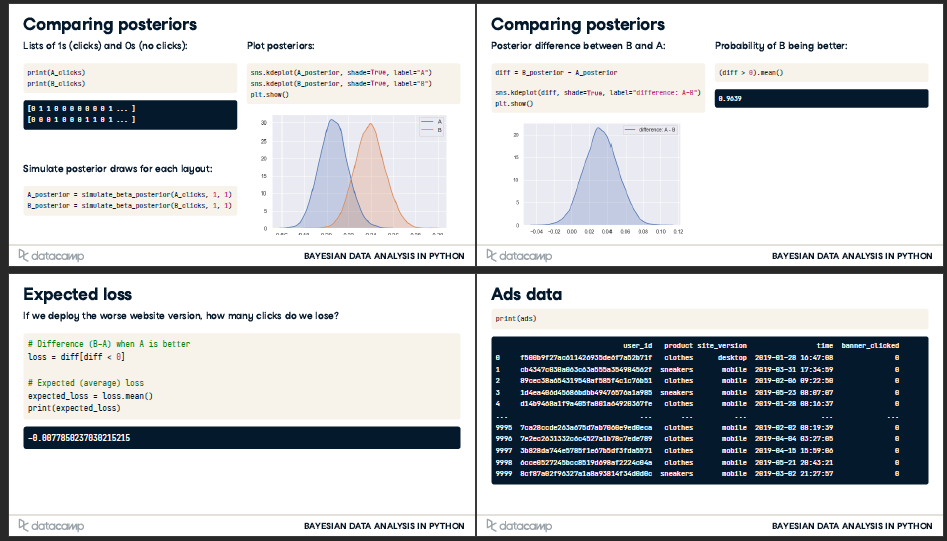


Got It!
1. A/B testing
Welcome back! Let's apply what you have learned so far to A/B testing!

2. A/B testing
A/B testing is a method for assessing user experience based on a randomized experiment, in which we divide our users into two groups.

1 Picture: adapted from https://commons.wikimedia.org/wiki/File:A-B_testing_simple_example.png
3. A/B testing
We expose each group to a different version of something, for instance, we show each group a different version of a website layout.

1 Picture: adapted from https://commons.wikimedia.org/wiki/File:A-B_testing_simple_example.png
4. A/B testing
Then, we compare the two groups based on some metric, such as which website version generated a higher click-through rate. Such an A/B test allows us to choose the better version of the website that would subsequently be shown to all users.

1 Picture: adapted from https://commons.wikimedia.org/wiki/File:A-B_testing_simple_example.png
5. A/B testing: frequentist way
The typical, frequentist approach to A/B testing is based on a statistical procedure known as hypothesis testing. The main drawback of this approach is that we can only conclude which group is better, but not how much better it is.

6. A/B testing: Bayesian approach
Alternatively, the Bayesian approach allows us to calculate the posterior click-through rates for websites A and B, compare them directly, and calculate the probability that one is better than the other. We can also quantify how much better it is, and even estimate the expected loss in case we make a wrong decision and deploy the worse website version.

7. A/B testing: Bayesian approach
You already know how to set up Bayesian A/B testing. To model whether a user clicks or doesn't click you can use the binomial distribution, with a click being a success, and the click rate being the probability of success.

8. Simulate beta posterior
We've seen that for binomial data, a beta prior would generate a beta posterior according to these formulas which you have already seen before. This allows us to simply sample the posterior draws from the appropriate beta distribution. Here is a custom function that you will use for this, called simulate_beta_posterior. It implements the formulas above, and it's the same as the get_heads_prob function you have used before. The only difference is that next to the 0-1 data, you can pass the two beta prior parameters as arguments. As a result, you get 10000 posterior draws, just like before.

9. Comparing posteriors
Imagine you have a list of 1s (clicks) and 0s (no-clicks) based on the website traffic for two website layouts: A and B. You can use the simulate_beta_posterior function to simulate posterior draws. Here, we are using a beta-1-1 prior. We can plot the two posteriors to see that B seems to be better, although the two overlap.

10. Comparing posteriors
We can subtract one from the other to calculate the posterior difference between click rates. It's very likely to be positive, which corresponds to B being better. To get the explicit probability of B being better than A, we can create a Boolean array that is True when B is better and False otherwise, and compute its mean. Here, there is a 96% probability that the B website layout is better!

11. Expected loss
We can also estimate the expected loss resulting from accidentally deploying a worse version. First, we slice the difference between the two posteriors to take only the rare cases where A is better. This is our loss. Then, we take the average to get the expected loss. If we deploy version B, which we know is better with 96% probability, but the 4% risk materializes and it turns out A was better, we will only lose 0-point-7 percentage points in the click-through rate.

12. Ads data
In this chapter, you will work with ads data adapted from Kaggle which contains information on whether ad banners of different products displayed on different site versions were clicked or not.

13. Let's A/B test!
Let's A/B test!

Simulate beta posterior
In the upcoming few exercises, you will be using the simulate_beta_posterior() function you saw defined in the last video. In this exercise, you will get a feel for what the function is doing by carrying out the computations it performs.

You are given a list of ten coin tosses, called tosses, in which 1 stands for heads, 0 for tails, and we define heads as a "success". To simulate the posterior probability of tossing heads, you will use a beta prior. 

Recall that if the prior is Beta(a,b), then the posterior is Beta(x,y), with:

x= #Heads(successes) + a

y= #Tosses(trials) - #Heads(successes) + b

In [ ]:
tosses = [1, 0, 0, 1, 0, 1, 1, 1, 0, 1]
# Set prior parameters and calculate number of successes
beta_prior_a = 1
beta_prior_b = 1
num_successes = np.sum(tosses)

# Generate 10000 posterior draws
posterior_draws = np.random.beta(
  num_successes + beta_prior_a, 
  len(tosses) - num_successes + beta_prior_b, 
  10000)  

# Plot density of posterior_draws
sns.kdeplot(posterior_draws, shade=True)
plt.show()

In [ ]:
# Set prior parameters and calculate number of successes
beta_prior_a = 1
beta_prior_b = 10
num_successes = np.sum(tosses)

# Generate 10000 posterior draws
posterior_draws = np.random.beta(
  num_successes+beta_prior_a, 
  len(tosses)-num_successes+beta_prior_b, 
  10000)  

# Plot density of posterior_draws
sns.kdeplot(posterior_draws, shade=True)
plt.show()

Now you see what simulate_beta_posterior() is doing: based on the binomial data and the prior, it samples posterior draws. Notice how using the Beta(1, 10) prior shifts the posterior to the left compared to Beta(1, 1). This effect is quite strong, as there is little data: just 10 coin flips. Let's move on to A/B testing!

--------------
Posterior click rates:

After a successful career episode at the Department for Health, you switch to marketing. Your new company has just run two pilot advertising campaigns: one for sneakers, and one for clothes. Your job is to find out which one was more effective as measured by the click-through rate and should be rolled out to a larger audience.

You decide to run A/B testing, modeling the data using the binomial likelihood. You found out that a typical click-through rate for the previous ads has been around 15% recently, with results varying between 5% and 30%. Based on this, you conclude that Beta(10,50)  would be a good prior for the click-through rate.

The ads data, the simulate_beta_posterior() function you saw in the video, and numpy (as np) are available in your workspace.

In [ ]:
def simulate_beta_posterior(trials, beta_prior_a, beta_prior_b):
    num_successes = np.sum(trials)
    return np.random.beta(num_successes + beta_prior_a, len(trials) - num_successes + beta_prior_b, 10000)

In [ ]:
# Generate prior draws
prior_draws = np.random.beta(10, 50, 100000)

# Plot the prior
sns.kdeplot(prior_draws, shade=True, label="prior")
plt.show()

# Extract the banner_clicked column for each product
clothes_clicked = ads.loc[ads["product"] == "clothes"]["banner_clicked"]
sneakers_clicked = ads.loc[ads["product"] == "sneakers"]["banner_clicked"]

# Simulate posterior draws for each product
clothes_posterior = simulate_beta_posterior(clothes_clicked, 10, 50)
sneakers_posterior = simulate_beta_posterior(sneakers_clicked, 10, 50)

A or B, and how sure are we?
You have just discovered that clothes ads are likely to have a higher click ratio than sneakers ads. But what is the exact probability that this is the case? To find out, you will have to calculate the posterior difference between clothes and sneakers click rates. Then, you will calculate a credible interval for the difference to measure the uncertainty in the estimate. Finally, you will calculate the percentage of cases where this difference is positive, which corresponds to clothes click rate being higher. Let's get on with it!

pymc3, seaborn, and matplotlib.pyplot have been imported for you as pm, sns, and plt, respectively. Also, clothes_posterior and sneakers_posterior which you have calculated in the previous exercise are available in your workspace.

In [ ]:
# ads = read_csv() #from Kaggle?

In [ ]:
# Calculate posterior difference and plot it
diff = clothes_posterior - sneakers_posterior
sns.kdeplot(diff, shade=True, label="diff")
plt.show()

# Calculate and print 90% credible interval of posterior difference
interval = pm.hpd(diff, hdi_prob=0.9)
print(interval)

# Calculate and print probability of clothes ad being better
clothes_better_prob = (diff>0).mean()
print(clothes_better_prob)

Take a look at the posterior density plot of the difference in click rates: it is very likely positive, indicating that clothes are likely better. The credible interaval indicates that with 90% probability, the clothes ads click rate is up to 2.4 percentage points higher than the one for sneakers. Finally, the probability that the clothes click rate is higher is 98%. Great! But there is a 2% chance that actually sneakers ads are better! How great is that risk? Let's find out!

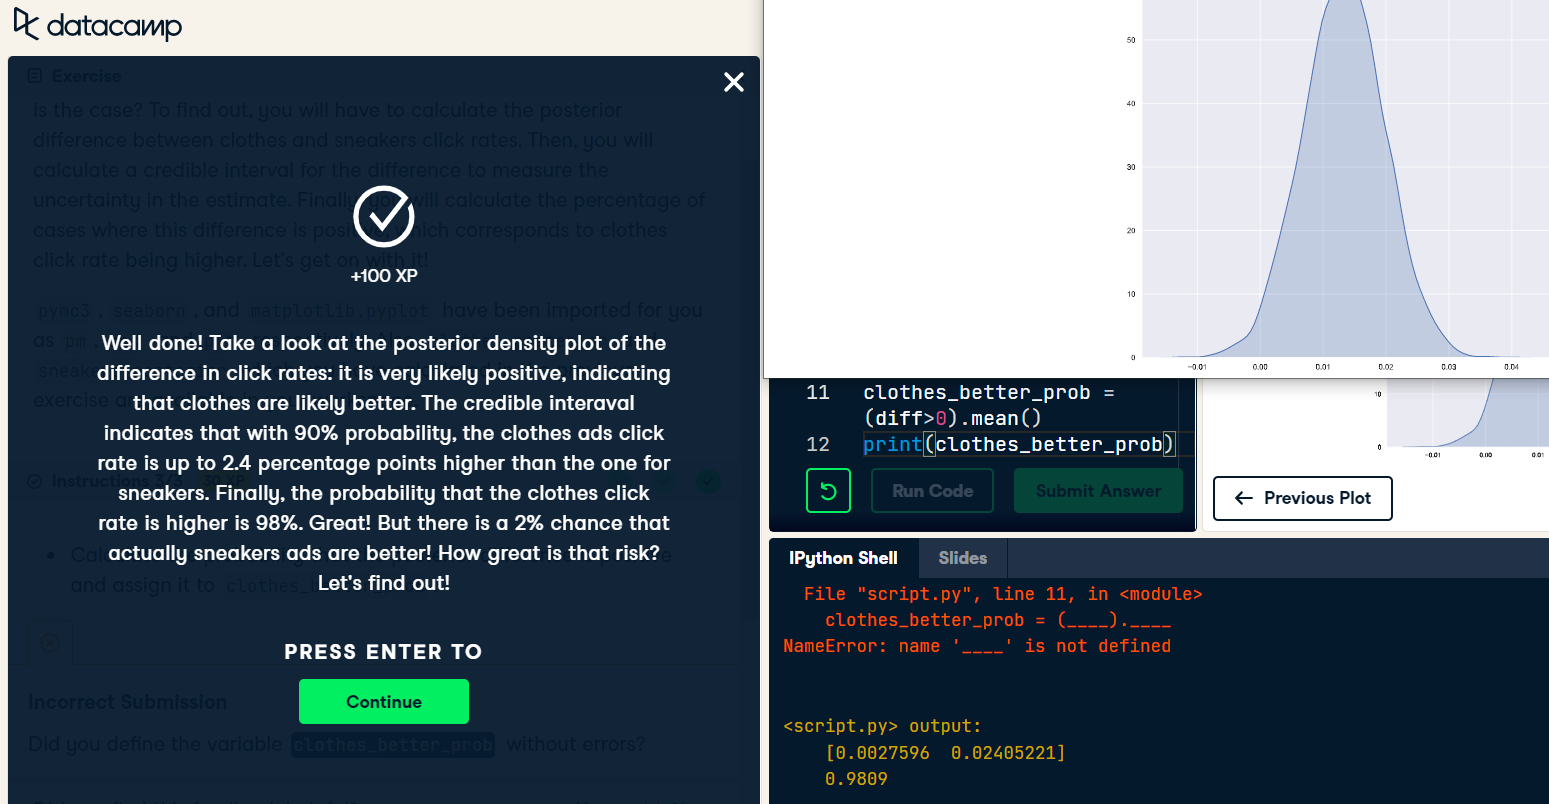

How bad can it be?
You have concluded that with 98% probability, clothes ads have a higher click-through ratio than sneakers ads. This suggests rolling out the clothes campaign to a larger audience. However, there is a 2% risk that it's the sneakers ads that are actually better. If that's the case, how many clicks do we lose if we roll out the clothes campaign?

The answer to this is the expected loss: the average posterior difference between the two click-through ratios given that sneakers ads do better. To calculate it, you only need to take the entries in the posterior difference where the sneakers click-through rate is higher and compute their average.

The posterior difference between the click rates, diff, is available in your workspace. Let's find out how much is at risk!

In [ ]:
# Slice diff to take only cases where it is negative
loss = diff[diff<0]

# Compute and print expected loss
expected_loss = np.mean(loss)
print(expected_loss)

You can sefely roll out the clothes campaign to a larger audience. You are 98% sure it has a higher click rare, and even if the 2% risk of this being a wrong decision materializes, you will only lose 0.2 percentage points in the click rate, which is a very small risk!

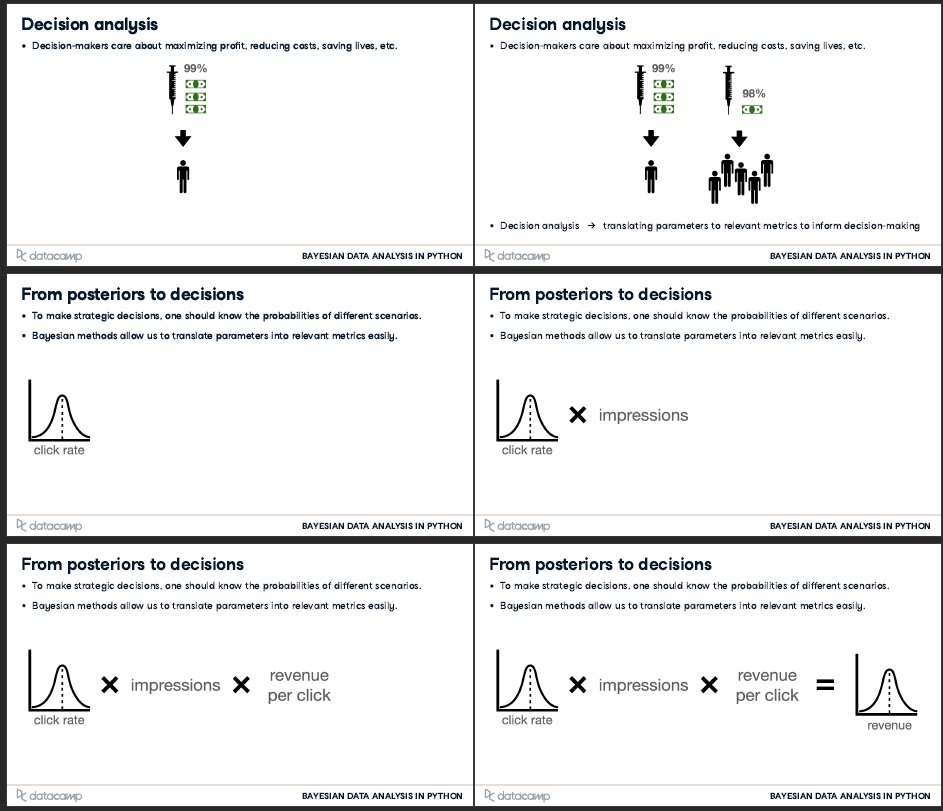
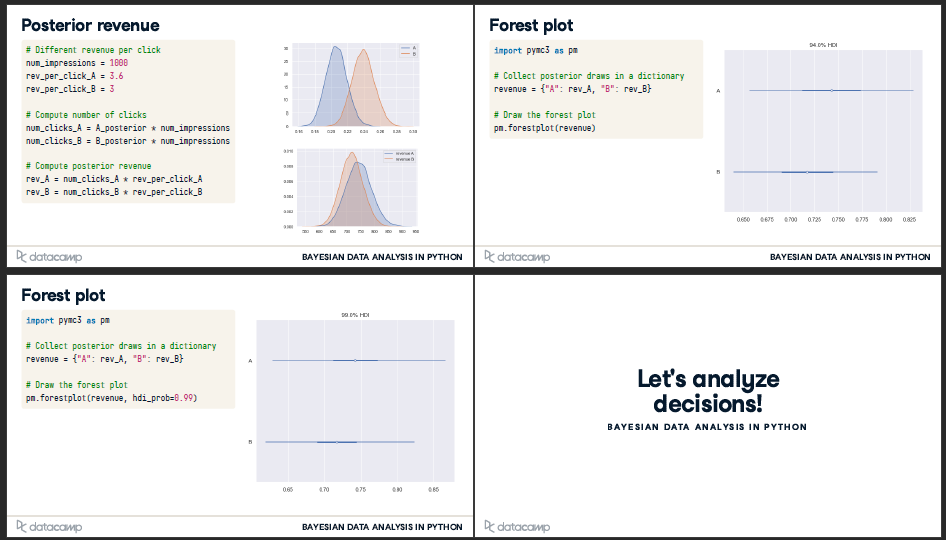

1. Decision analysis
Welcome back! We will now learn how to make informed decisions based on the results of a Bayesian analysis.

2. Decision analysis
Most often, decision-makers don't care about the parameters of statistical models. What they do care about is maximizing profit, reducing costs, or saving lives. Consider the efficacy of the drug you have been estimating previously. Say the posterior mean of the efficacy rate is 99%. It's the most effective drug according to the model. However, it is also expensive and with limited budget the government cannot afford enough doses.

3. Decision analysis
Now, consider another drug, with slightly lower efficacy, but much cheaper. This other drug might allow the government to save many more lives! This is the role of decision analysis: to translate the parameters of statistical models into relevant metrics in order to inform decision-making.

4. From posteriors to decisions
Businesses and government agencies alike constantly operate under uncertainty. To make strategic decisions, it helps to know the probabilities of different scenarios playing out. Bayesian methods allow us to translate posterior distributions of the parameters that capture this uncertainty into relevant metrics very easily. Imagine you have just sampled from the posterior distribution of a model parameter, say: a click-through rate. Your company, however, is not very interested in the rate itself, but rather in the revenue the clicks generate.

5. From posteriors to decisions
You can multiply each draw from the posterior with the number of impressions, that is the number of people to whom the ad will be displayed. This way, you get a distribution of the number of clicks instead of the click-through rate.

6. From posteriors to decisions
You can then multiply the result with the expected revenue per click, a metric the company already knows.

7. From posteriors to decisions
As a result, you obtain a posterior distribution of the revenue generated by the clicks. Notice how capturing uncertainty via probability distributions has been translated from model parameters to a business-relevant metric! Based on the outcome, the decision-makers know what revenue to expect, as well as what's the worst-case scenario and how probable it is, and they can decide accordingly.

8. Posterior revenue
Let's see this in action. Say you have simulated posterior draws of the click rates for two ads: A and B. You are going to display the ads to 1000 users. The expected revenue from one click, however, is different for each ad, as they advertise different products. For ad A, it's $3-point-6 and for ad B it's $3. To get the distribution of the number of clicks for both ads, you can multiply the posterior with the number of impressions. Then, multiply the outcome with the revenue per click to get the distribution of the total revenue.

9. Forest plot
So far, we have been plotting multiple density plots together using seaborn. This is not very convenient and gets messy with more plots. The solution is to use a forest plot instead. It's included in pymc3, the same package you have already used for calculating credible intervals, and you will get more familiar with it in the next chapter. The only thing to do is to create a dictionary with the posterior draws. Then, we can call the pm-dot-forestplot function on this dictionary. Each density is represented as a line. The bolder line in the middle of each density denotes the interquartile range, while the thin whiskers show the HDI credible interval of 94% by default.

10. Forest plot
One can easily adjust it by passing the hdi_prob argument with the desired HDI value: here, 99%.

11. Let's analyze decisions!
Let's analyze decisions!

Decision analysis: cost
Your journey in marketing continues. You have already calculated the posterior click rates for clothes and sneakers ads, available in your workspace as clothes_posterior and sneakers_posteriors, respectively. Your boss, however, is not interested in the distributions of click rates. They would like to know what would be the cost of rolling out an ad campaign to 10'000 users. The company's advertising partner charges $2.5 per click on a mobile device and $2 on a desktop device. Your boss is interested in the cost of the campaign for each product (clothes and sneakers) on each platform (mobile and desktop): four quantities in total.

Let's compare these four posterior costs using the forest plot from pymc3, which has been imported for you as pm.

In [ ]:
# Calculate distributions of the numbers of clicks for clothes and sneakers
clothes_num_clicks = clothes_posterior * 10_000
sneakers_num_clicks = sneakers_posterior * 10_000

# Calculate cost distributions for each product and platform
ads_costs = {
    "clothes_mobile": clothes_num_clicks * 2.5,
    "sneakers_mobile": sneakers_num_clicks * 2.5,
    "clothes_desktop": clothes_num_clicks * 2,
    "sneakers_desktop": sneakers_num_clicks * 2,
}

# Draw a forest plot of ads_costs
pm.forestplot(ads_costs, hdi_prob=0.99, textsize=15)
plt.show()

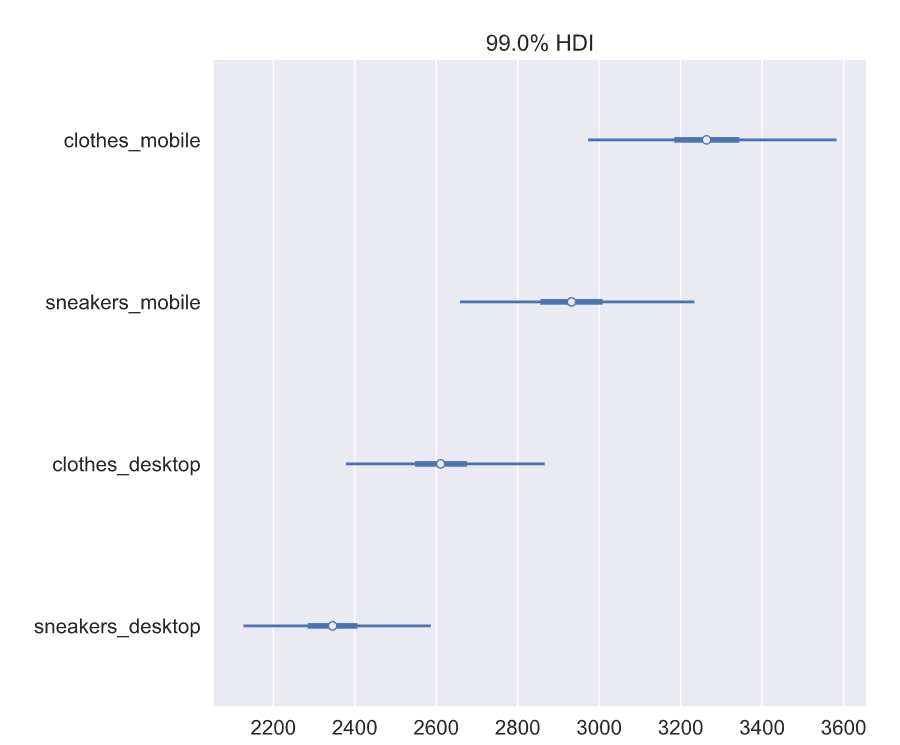

In [ ]:
# Calculate profit distributions for each product and platform
ads_profit = {
    "clothes_mobile": 3.4*clothes_num_clicks-ads_costs['clothes_mobile'],
    "sneakers_mobile": 3.4*sneakers_num_clicks-ads_costs['sneakers_mobile'],
    "clothes_desktop": 3*clothes_num_clicks-ads_costs['clothes_desktop'],
    "sneakers_desktop": 3*sneakers_num_clicks-ads_costs['sneakers_desktop'],
}

# Draw a forest plot of ads_profit
pm.forestplot(ads_profit, hdi_prob=0.99)
plt.show()

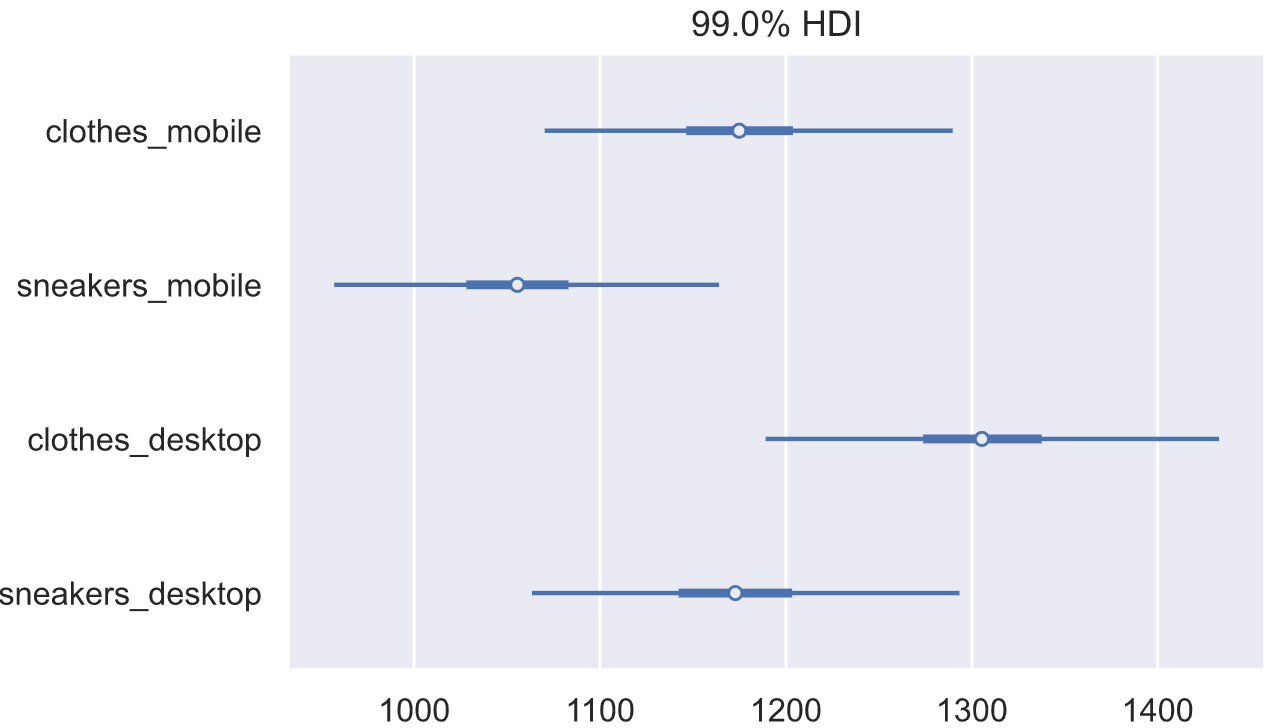
Notice how shifting focus from costs to profit has changed the optimal decision. The sneakers-desktop campaign which minimizes the cost is not the best choice when you care about the profit. Based on these results, you would be more likely to invest in the clothes-desktop campaign, wouldn't you? Let's continue to the final lesson of this chapter, where we look at regression and forecasting, the Bayesian way

--------------------------------
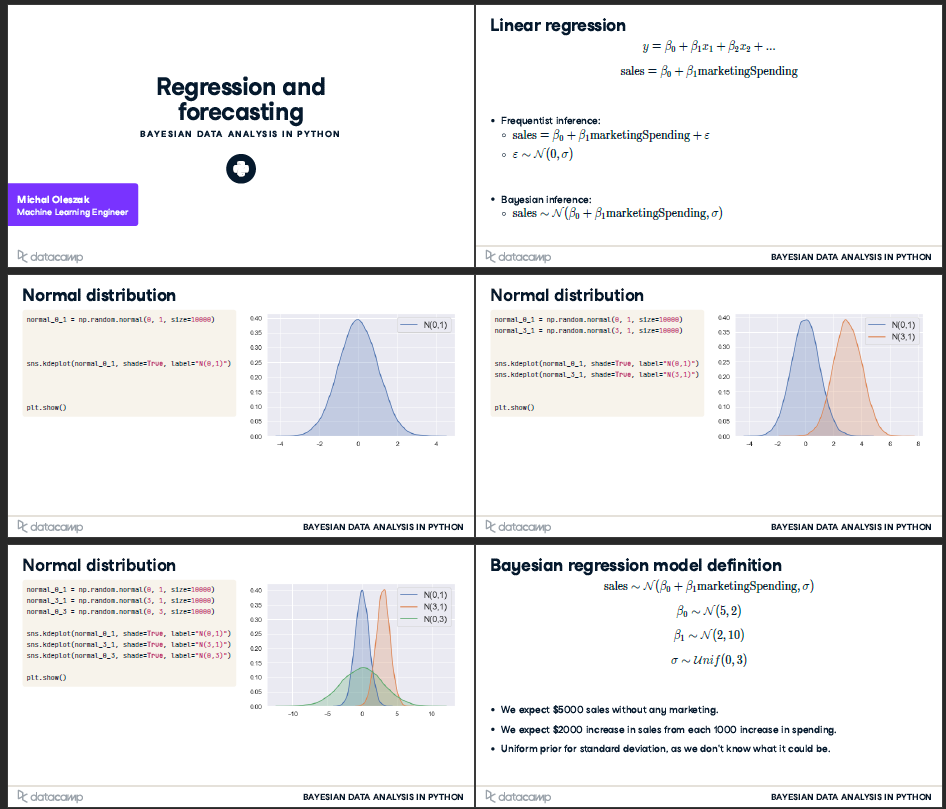
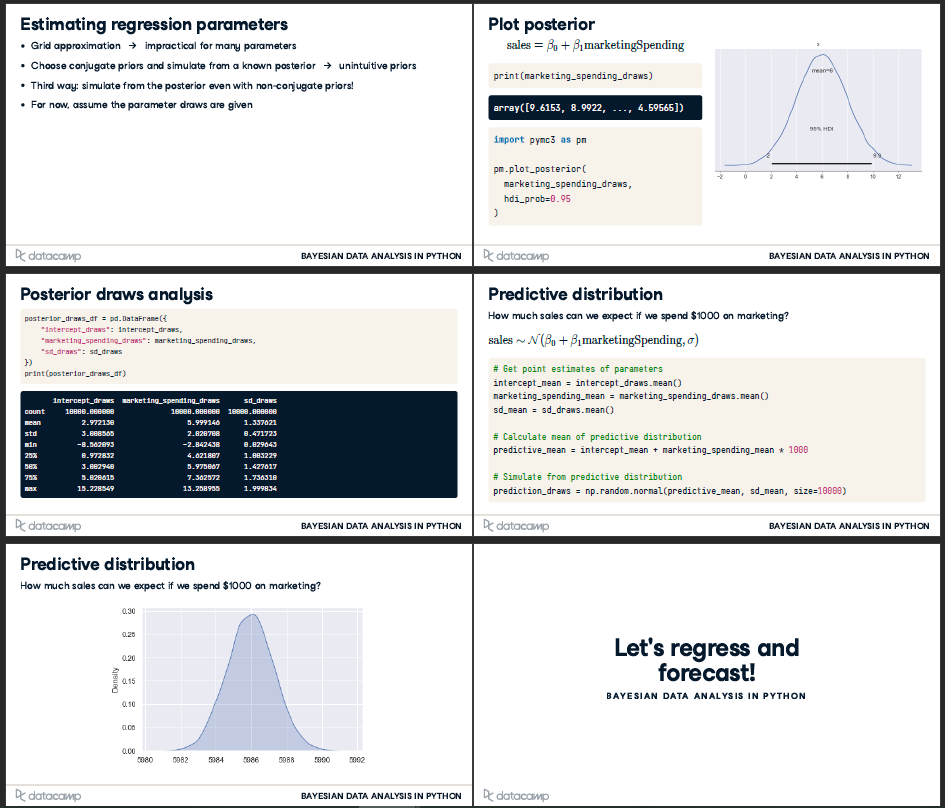
1. Regression and forecasting
Let's dive into regression and predictions!

2. Linear regression
In a linear regression model we are modeling the response, y, as a linear combination of some predictors, x. We can model sales as a function of marketing spending, for instance. The intercept, Beta-zero, is sales level without any spending, and beta-one denotes the impact of marketing spending on sales. In the frequentist world, betas are single numbers and we cannot find values for them that would make the equation always hold. Consequently, we add an error term denoted by the Greek letter epsilon and say that this error term has a normal distribution with mean zero and some standard deviation, sigma. In the Bayesian world, we treat the response as a random variable, and assume that it has a normal distribution with the mean defined by the regression equation and some standard deviation. Let's take a closer look at the normal distribution then!

3. Normal distribution
Let's sample draws from the normal distribution and plot them to see how it looks like. To do this, we use the np-dot-random-dot-normal function, with two parameters to set: the mean and the standard deviation, which we set to 0 and 1 respectively. The normal distribution density, also called a bell curve, is symmetric around its mean and almost all the probability mass is within its mean plus/minus 3 standard deviations.

4. Normal distribution
By setting the mean to 3, the distribution shifts and centers around 3.

5. Normal distribution
By increasing the standard deviation to 3 instead, the distribution becomes wider and shorter.

6. Bayesian regression model definition
Let's now define our Bayesian regression model. We have already said that sales are normally distributed but a full model specification also requires the priors for all 3 parameters: the intercept, the spending impact, and the standard deviation. We could use many priors, but let's use normal ones for the betas. Assume sales and spendings are in thousands of dollars. First, we expect $5000 sales without any marketing. Also, we expect $2000 increase in sales from each $1000 increase in spending, but are not certain, so we make the prior for beta-1 wider by setting its standard deviation to 10. We don't have any feelings about the regression standard deviation parameter, sigma, so we use the uniform prior.

7. Estimating regression parameters
How to get the posteriors? Grid approximation could work, but is impractical for more than one parameter. We could choose conjugate priors so that we can simulate from the posterior, but the conjugate priors for linear regression are not very intuitive. And we want our priors! Fortunately, we can simulate from the posterior even with non-conjugate priors using Markov Chain Monte Carlo, a technique which will be covered in the next chapter. For now, let's assume we have sampled the parameter draws and focus on working with them.

8. Plot posterior
A good practice is to analyze the posterior draws visually before we make any predictions with the model. Let's introduce another function from pymc3 called plot_posterior. You pass it the draws and set the credible interval, and it plots the density, marking its mean and the interval.

9. Posterior draws analysis
With many parameters, it's convenient to look at all of them at once. Once you have all three parameters sampled, you can collect them in a DataFrame and use the dot-describe method, which allows us to inspect the descriptive statistics of the posterior draws.

10. Predictive distribution
Time to make predictions. How much sales can we expect if we spend $1000 on marketing? To calculate it, we first get the point estimates of the parameters, in this case the posterior mean. Then, we calculate the mean of the sales distribution according to the regression formula, setting 1000 as the marketing spending. Finally, we simulate from the predictive distribution to get the sales forecast.

11. Predictive distribution
And here is the result! With $1000 marketing spending, we can expect slightly less than $6000 in sales.

12. Let's regress and forecast!
Let's practice!

In [ ]:
# Collect parameter draws in a DataFrame
posterior_draws_df = pd.DataFrame({
    "intercept_draws": intercept_draws,
    "clothes_draws": clothes_draws,
  	"sneakers_draws": sneakers_draws,
    "sd_draws": sd_draws,
})

# Describe parameter posteriors
draws_stats = posterior_draws_df.describe()
print(draws_stats)

# Plot clothes parameter posterior
pm.plot_posterior(clothes_draws, hdi_prob=0.99)
plt.show()

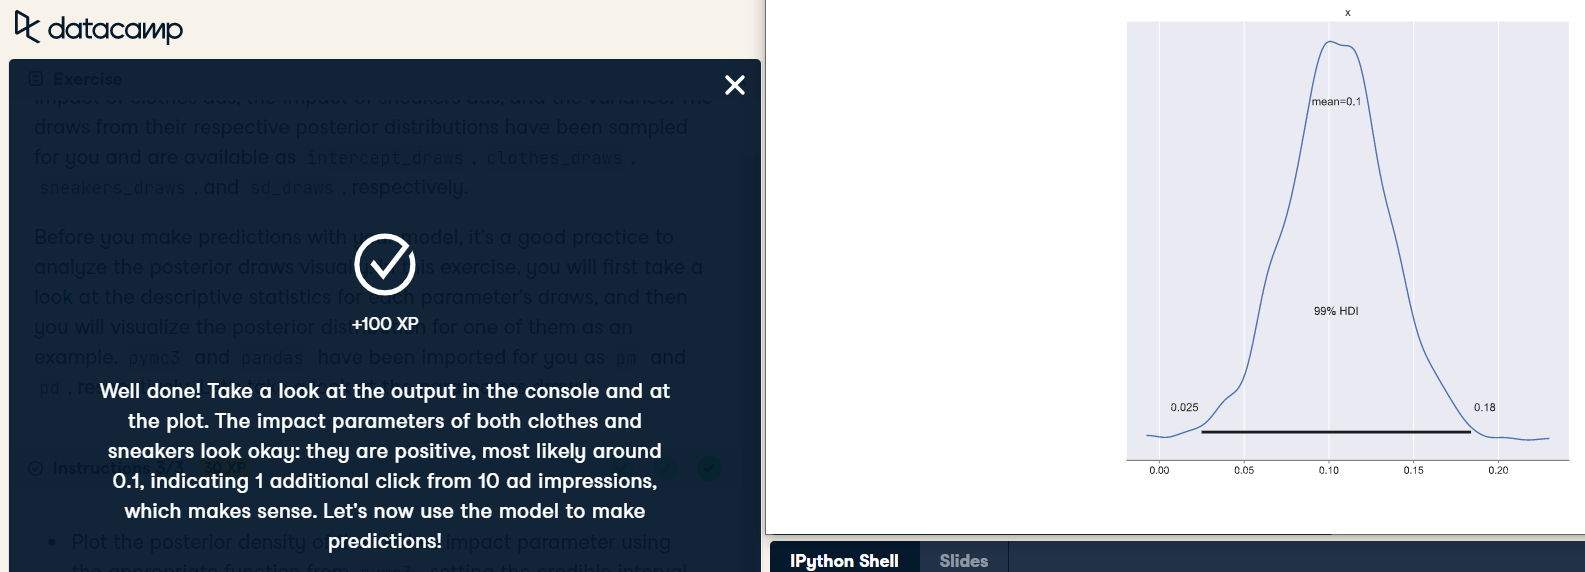

Predictive distribution
Good job analyzing the parameter draws! Let's now use the linear regression model to make predictions. How many clicks can we expect if we decide to show 10 clothes ads and 10 sneaker ads? To find out, you will have to draw from the predictive distribution: a normal distribution with the mean defined by the linear regression formula and standard deviation estimated by the model.

First, you will summarize each parameter's posterior with its mean. Then, you will calculate the mean of the predictive distribution according to the regression equation. Next, you will draw a sample from the predictive distribution and finally, you will plot its density. Here is the regression formula for your convenience:

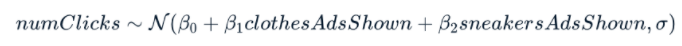

The number of clicks has a normal distribution with the mean β0 + β1 * clothes-ads-shown + β2 * sneakers-ads-shown, and some standard deviation sigma.

pymc3, numpy, and seaborn have been imported under their usual aliases.

In [ ]:
# Aggregate posteriors of the parameters to point estimates
intercept_coef = np.mean(intercept_draws)
sneakers_coef = np.mean(sneakers_draws)
clothes_coef = np.mean(clothes_draws)
sd_coef = np.mean(sd_draws)

# Calculate the mean of the predictive distribution
pred_mean = intercept_coef + sneakers_coef * 10 + clothes_coef * 10

# Sample 1000 draws from the predictive distribution
pred_draws = np.random.normal(pred_mean, sd_coef, size=1000)

# Plot the density of the predictive distribution
pm.plot_posterior(pred_draws, hdi_prob=0.99)
plt.show()

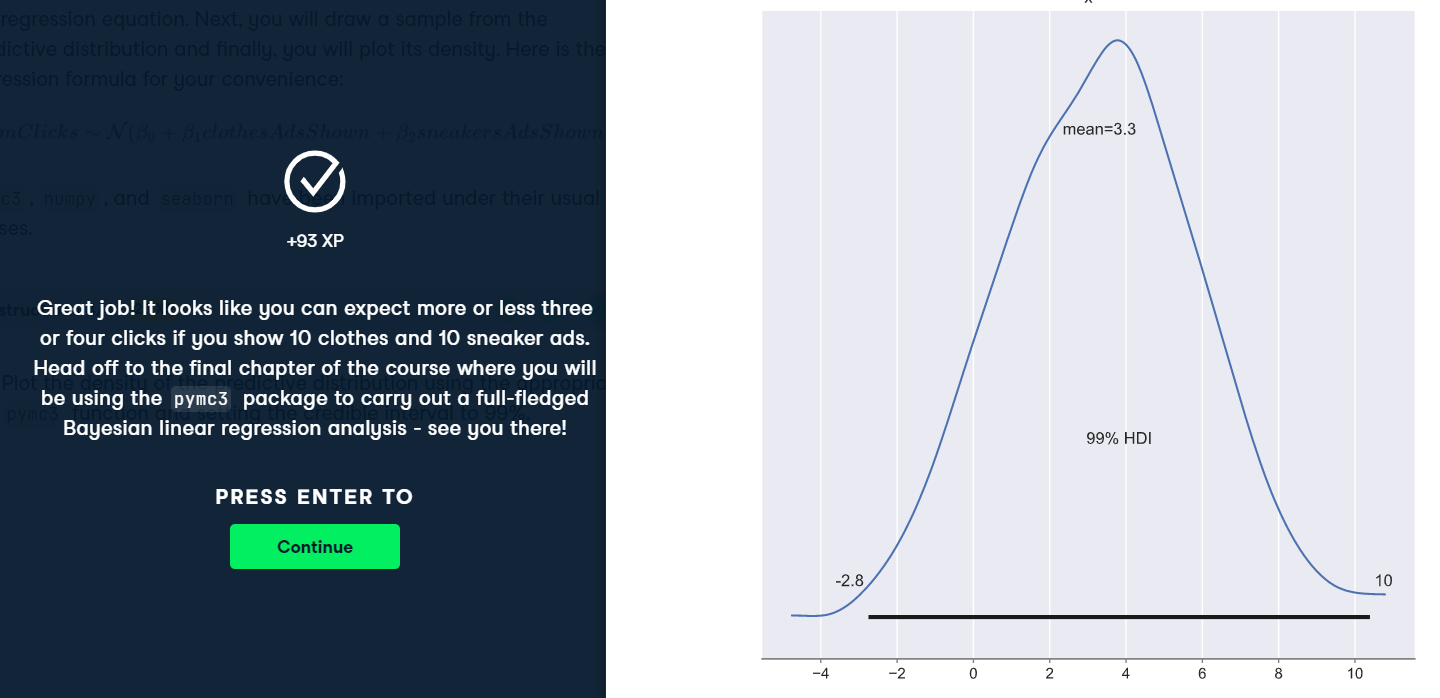

----------------------------------------------------------------------------------------------------------
CHAPTER 4: MARKOV CHAIN MONTE CARLO

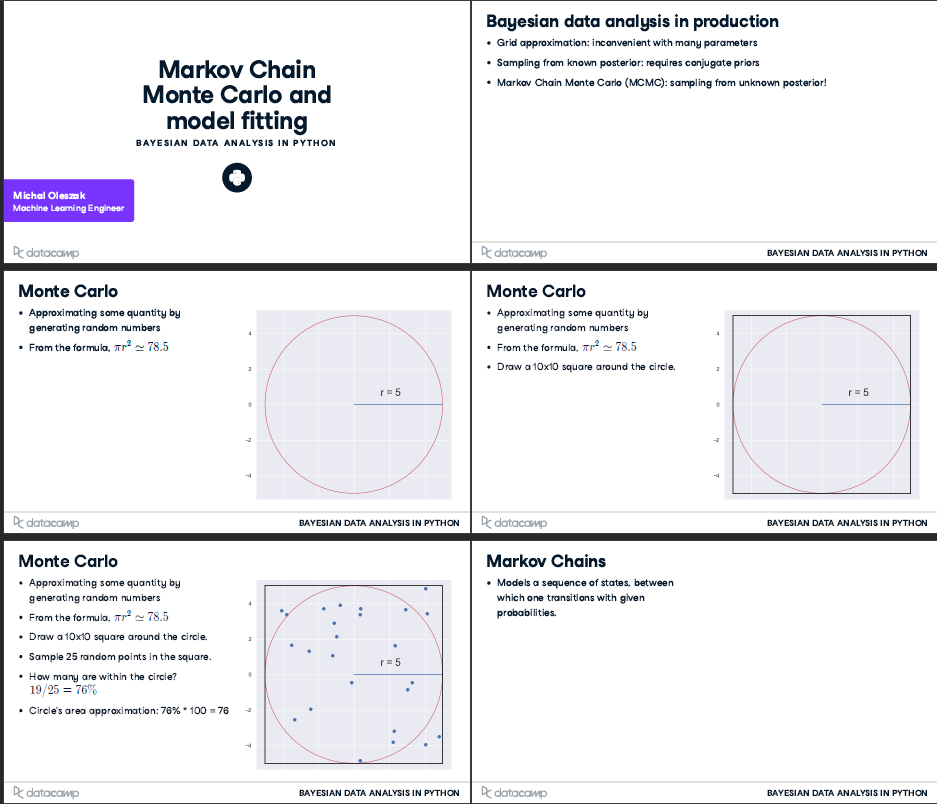
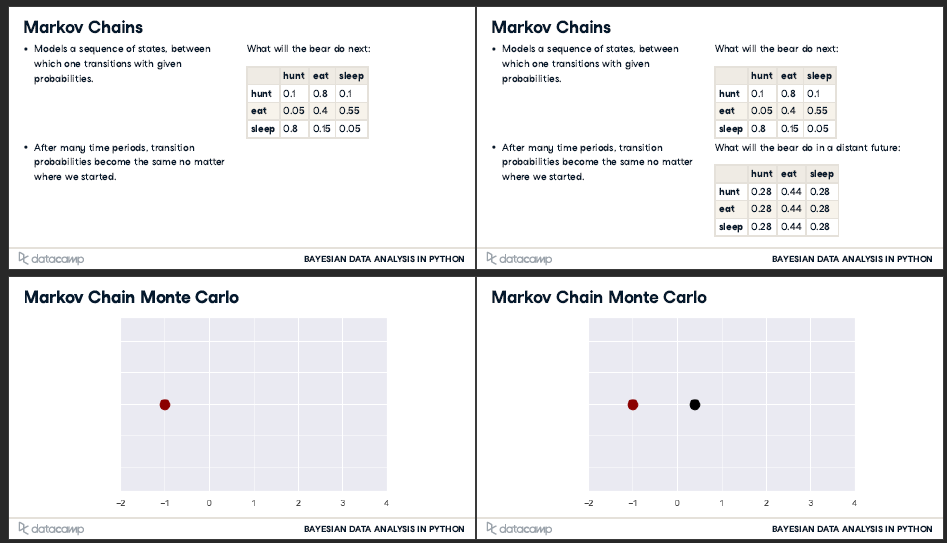
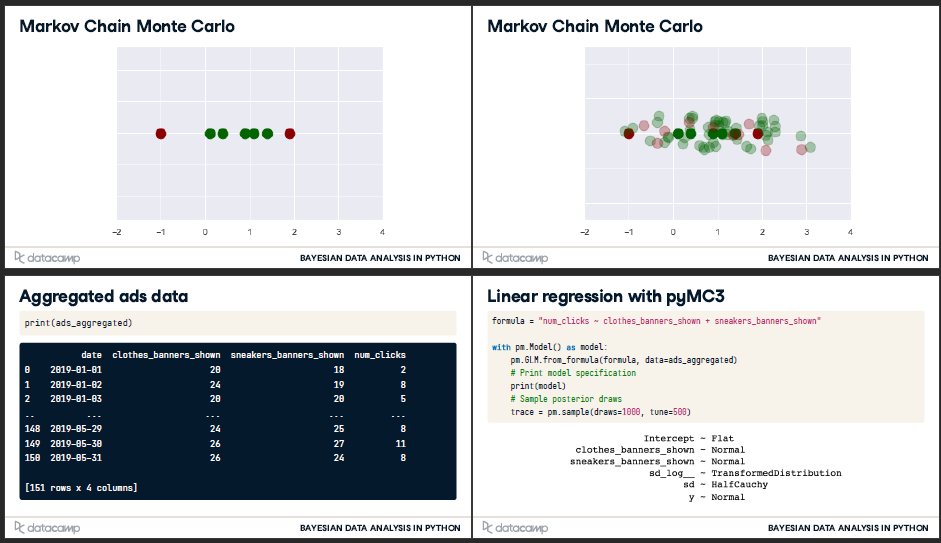

1. Markov Chain Monte Carlo and model fitting
Welcome back!

2. Bayesian data analysis in production
We've seen two ways of sampling posterior draws: grid approximation and choosing conjugate priors and sampling from a known posterior, each with their own limitations. In practice, another method is usually used: Markov Chain Monte Carlo, or MCMC, which allows us to sample even from unknown posteriors. All three methods yield the same results, but MCMC is the most flexible - it works with any model and any priors. Let's look at its two building blocks: Monte Carlo and Markov Chains.

3. Monte Carlo
Monte Carlo is a way to approximate a quantity by generating random numbers. Consider a circle with radius 5. From the formula, we know its area to be 78.5.

4. Monte Carlo
But how might we approximate the area without the formula? To start, we can define a 10-by-10 square on the circle.

5. Monte Carlo
Then, we generate random points inside the square. The more points, the more precise the approximation. Let's use only 25. 19 out of 25 points, or 76%, fell inside the circle, meaning the circle's area is roughly 76% of the square's area, or: 76. Not bad using random numbers!

6. Markov Chains
Now, to Markov Chains. They are models of a sequence of states, between which one transitions with given probabilities.

7. Markov Chains
Imagine a bear that only hunts, eats and sleeps. The table shows the probabilities of transitioning between these three states. From the first row we see that if the bear is hunting now, there is a 10% probability it will hunt or sleep next, and an 80% probability it will eat.

8. Markov Chains
Some Markov Chains have a property that, after transitioning between states many times, they will reach a so-called steady state. This means that no matter where the bear started, the probabilities for it to be in particular states in a distant future are the same.

9. Markov Chain Monte Carlo
Let's put it all together! There are many MCMC samplers, but all work in a similar fashion. To get posterior draws for a parameter, we start by generating a random point.

10. Markov Chain Monte Carlo
Then another one, close to the first - that's the Monte Carlo part, random generation. Then, we check how well this new point explains our data, or: what's the likelihood with this value of the parameter. Then, we either accept or reject this new point. The better it explains the data, the higher the probability that we accept it.

11. Markov Chain Monte Carlo
Here, the new point explains our data well, and we accept it, which I denote by green.

12. Markov Chain Monte Carlo
Next, we sample another point, close to the last accepted point.

13. Markov Chain Monte Carlo
However, it doesn't explain the data well enough, so we reject it, denoted by red.

14. Markov Chain Monte Carlo
But we accept the next one.

15. Markov Chain Monte Carlo
And the next three.

16. Markov Chain Monte Carlo
Eventually we have many accepted points. This generates a Markov Chain, and the probabilities of sampling specific values converge to the steady state, which is our posterior distribution. Finally, we discard some number of first draws, called burn-in, sampled before the Markov Chain has converged, since they are simply random. The remaining ones are our posterior draws.

17. Aggregated ads data
Here is the previous ads data. We want to predict num_clicks with a regression model using clothes_banners_shown and sneakers_banners_shown.

18. Linear regression with pyMC3
We start by defining the regression formula, consisting of the response, a tilde sign, and the predictors separated with pluses. We open the with statement with pymc3.model instance as the model. Inside it, we define the model by calling pm.glm.from_formula with the formula and the data passed as arguments. GLM stands for generalized linear model, a class of models that includes linear regression. We could define the priors and the likelihood here, but the defaults are good for linear regression. We can print the model to see the priors for the parameters, and at the bottom, the normal likelihood for our target variable. Finally, we call pm-sample to generate 1000 valid draws, and 500 burn-in draws, set by the tune parameter. This output is conventionally called a trace.

19. Let's practice MCMC!
Let's practice!

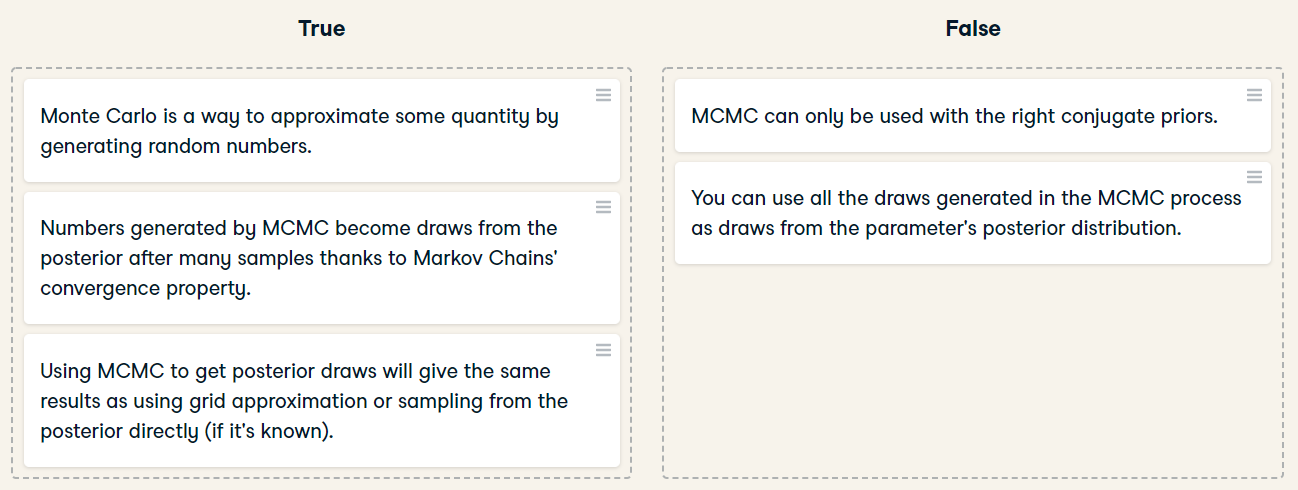

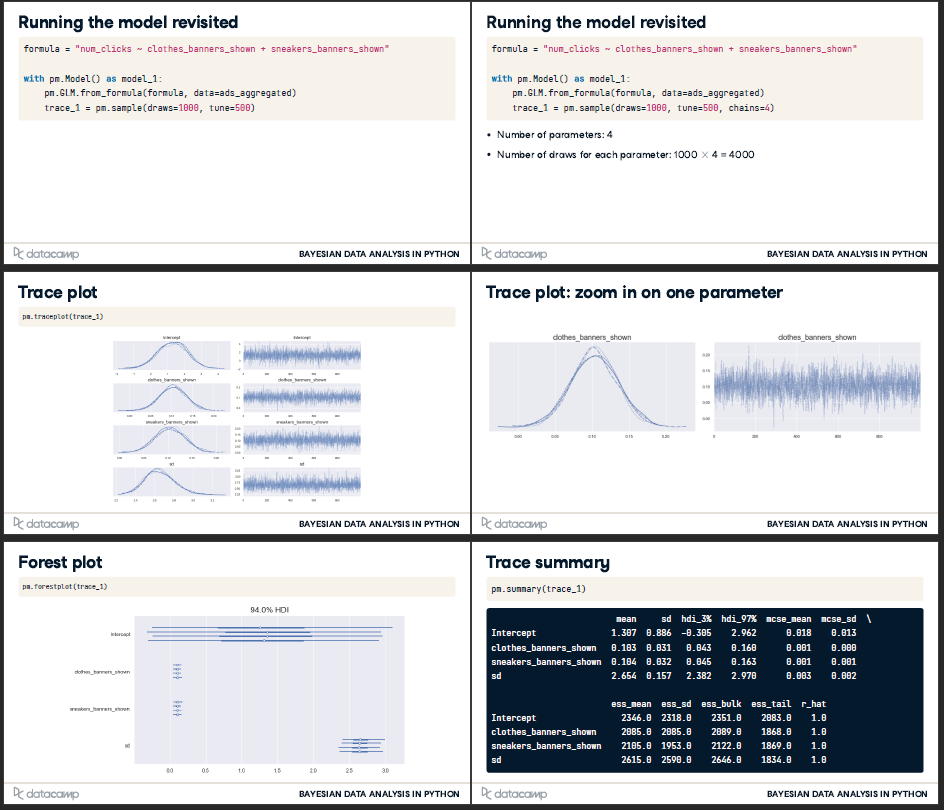
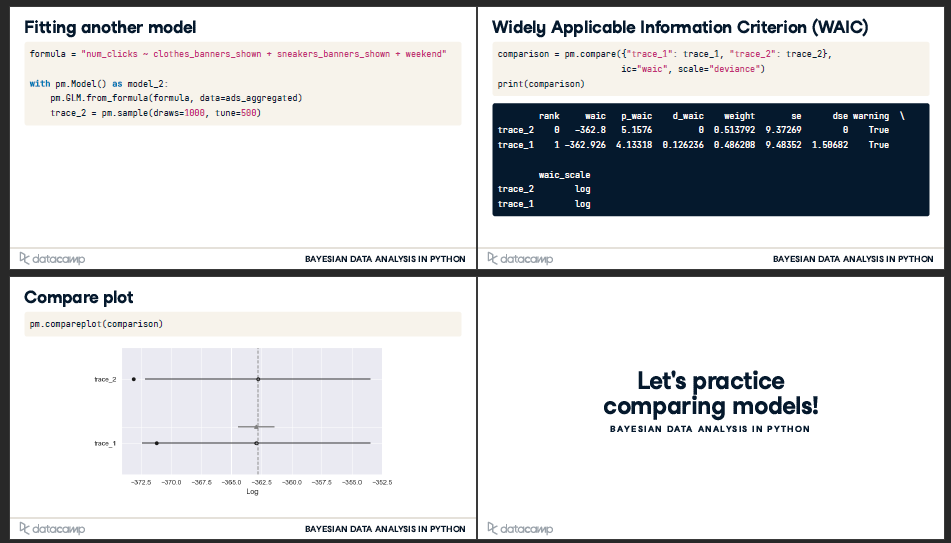

1. Interpreting results and comparing models
Welcome back! Let's learn to analyze and compare model results.

2. Running the model revisited
Here is the model from before. Using pm-dot-sample, we specified 1000 valid posterior draws and before them, 500 burn-in draws were sampled and discarded.

3. Running the model revisited
We didn't set the chains parameter, which defaults to the number of cores of one's machine. Mine has 4, so chains was set to 4. The number of chains is the number of independent repetitions of the sampling process. It's generally recommended to have more than 1 chain in case some of them don't converge. We have 4 parameters in the model: the intercept, two impact parameters, and the standard deviation. For each of them, we have 1000 draws per chain, and so we get 4000 posterior draws in total.

4. Trace plot
We can visualize our sampled draws by passing the trace to the pm-dot-traceplot function. It produces two subplots per parameter. Let's zoom in at one of them.

5. Trace plot: zoom in on one parameter
On the left, we have the posterior density plot. There are four lines on the plot, one for each chain. The fact that they are all similar indicates they are truly sampled from the right posterior. On the right, we have a line plot of all 4000 draws, separately for each chain. They oscillate closely around some constant average, which proves good convergence.

6. Forest plot
We can also pass the trace to the forestplot function, which you already know. This time, it will show a separate line for each chain of each parameter. We see that except from the intercept, we are pretty confident about the other parameters' values.

7. Trace summary
To calculate some summary statistics of the posterior draws, we can call pm-dot-summary with the trace object passed to it. It produces a table with a lot of valuable insights. In the first two columns, we can see the mean and the standard deviation of the draws for each parameter. Next, we have the ends of the 97% credible interval. It seems that the impact of clothes and sneakers is very similar! Finally, take a look at the last column labelled r_hat. This number is only computed if we run more than one chain. Values of r_hat greater than one indicate that some chains have not converged. Here, we have ones top to bottom, so everything's fine.

8. Fitting another model
Now, consider another model, let's call it model_2. It's similar to the one before. The only difference is that we add one more explanatory variable: weekend, with a 1 denoting a weekend day, and zero otherwise.

9. Widely Applicable Information Criterion (WAIC)
We can compare two models based on the Widely Applicable Information Criterion, or WAIC. To do so, we gather the model traces in one dictionary and pass it to pm-dot compare, setting ic to "waic" and scale to "deviance". We can then print the resulting comparison table. WAIC is a measure of model fit. The lower it is, the better the model. Here, model_2 which uses the weekend variable is slightly better than model_1. Since the Bayesian approach is all about probability, we can also calculate the probability of each model being the true model. It is shown in the weight column and suggests that model_2 is slightly better.

10. Compare plot
We can also plot the model comparison with pm.compareplot. The empty circles show the WAIC values for each model and the black error bars associated with them show their standard deviations. For all but the top model, we also get a gray triangle indicating the difference in WAIC between that model and the top one. The standard deviation error bars show we are not that confident in the superiority of model_2.

11. Let's practice comparing models!
Let's practice comparing models!

In [ ]:
# Import pymc3
import pymc3 as pm

# Draw a trace plot of trace_1
pm.traceplot(trace_1)
plt.show()

# Draw a forest plot of trace_1
pm.forestplot(trace_1)
plt.show()

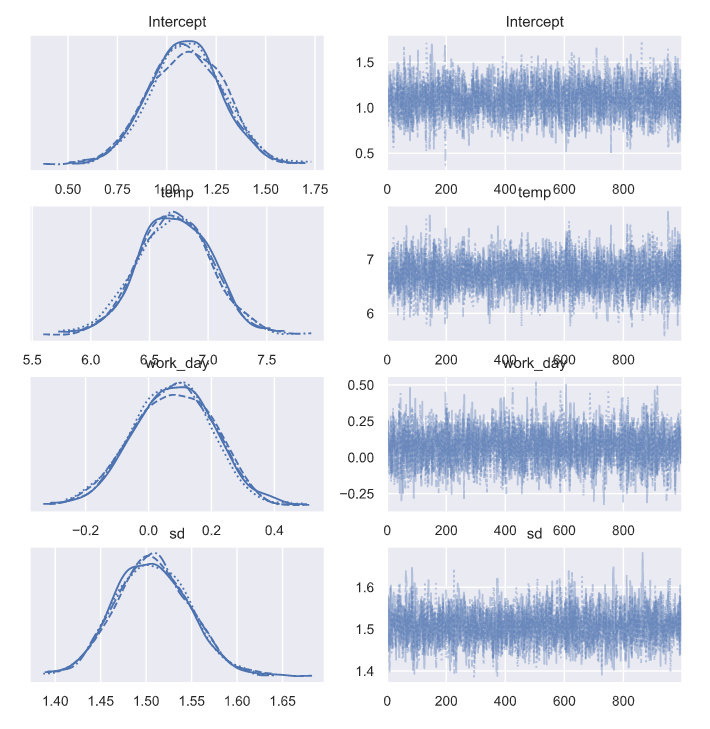
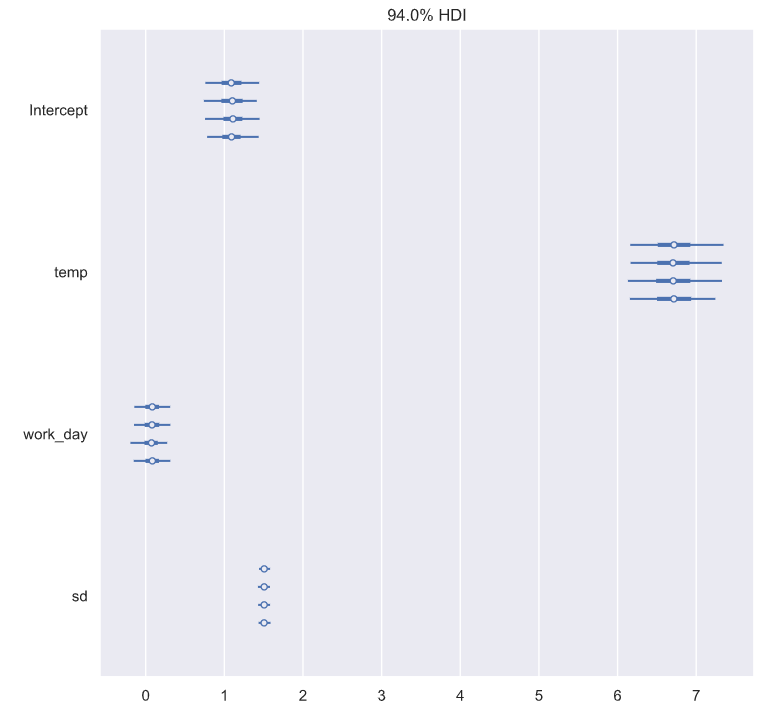
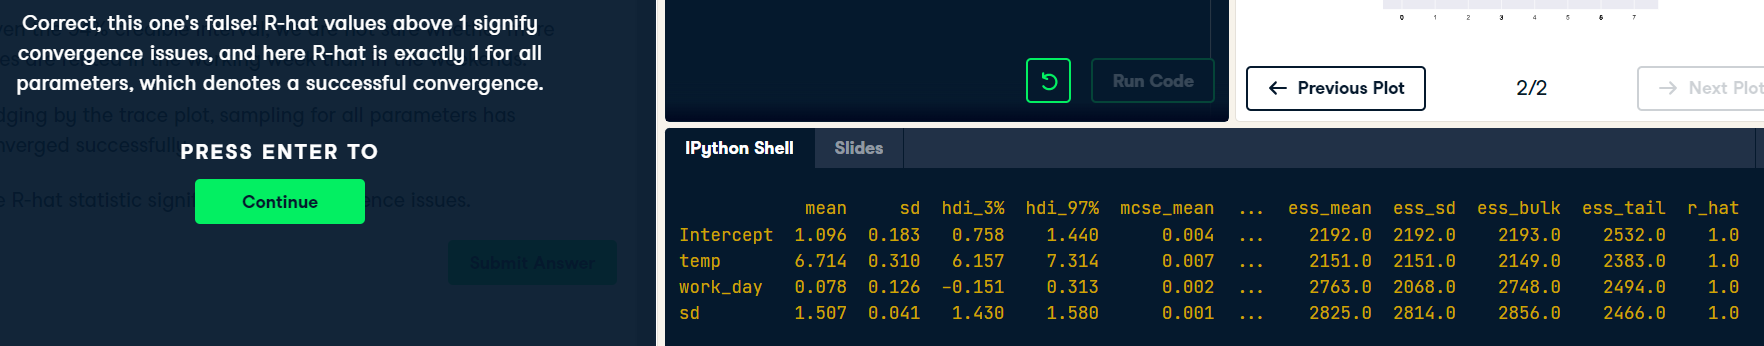

Comparing models with WAIC
Now that you have successfully built the first, basic model, you take another look at the data at your disposal. You notice a variable called wind_speed. This could be a great predictor of the numbers of bikes rented! Cycling against the wind is not that much fun, is it?

You fit another model with this additional predictor:

formula = "num_bikes ~ temp + work_day + wind_speed"

with pm.Model() as model_2:

    pm.GLM.from_formula(formula, data=bikes)
    trace_2 = pm.sample(draws=1000, tune = 500)
    
Is your new model_2 better than model_1, the one without wind speed? Compare the two models using Widely Applicable Information Criterion, or WAIC, to find out!

Both trace_1 and trace_2 are available in your workspace, and pycm3 has been imported as pm

In [ ]:
# Gather trace_1 and trace_2 into a dictionary
traces_dict = {"trace_1": trace_1, "trace_2": trace_2}

# Create a comparison table based on WAIC
comparison = pm.compare(traces_dict, ic="waic")

# Draw a comparison plot
pm.compareplot(comparison, textsize=20)
plt.show()

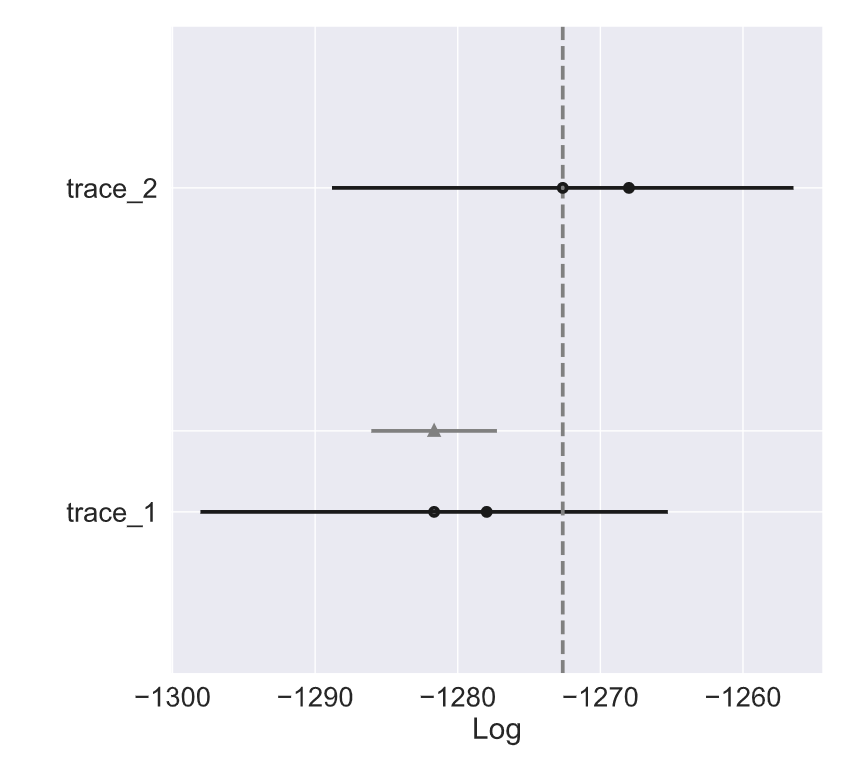

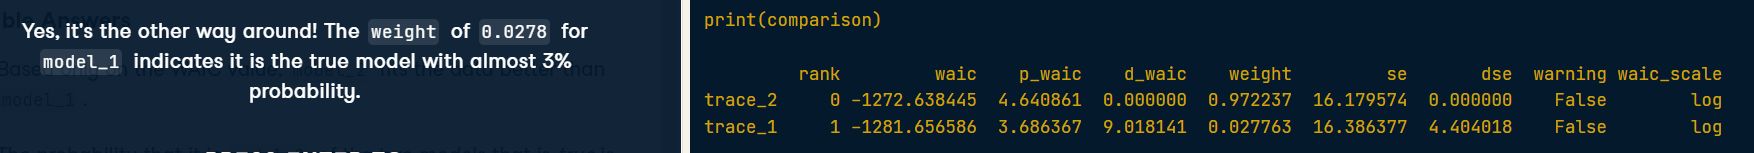

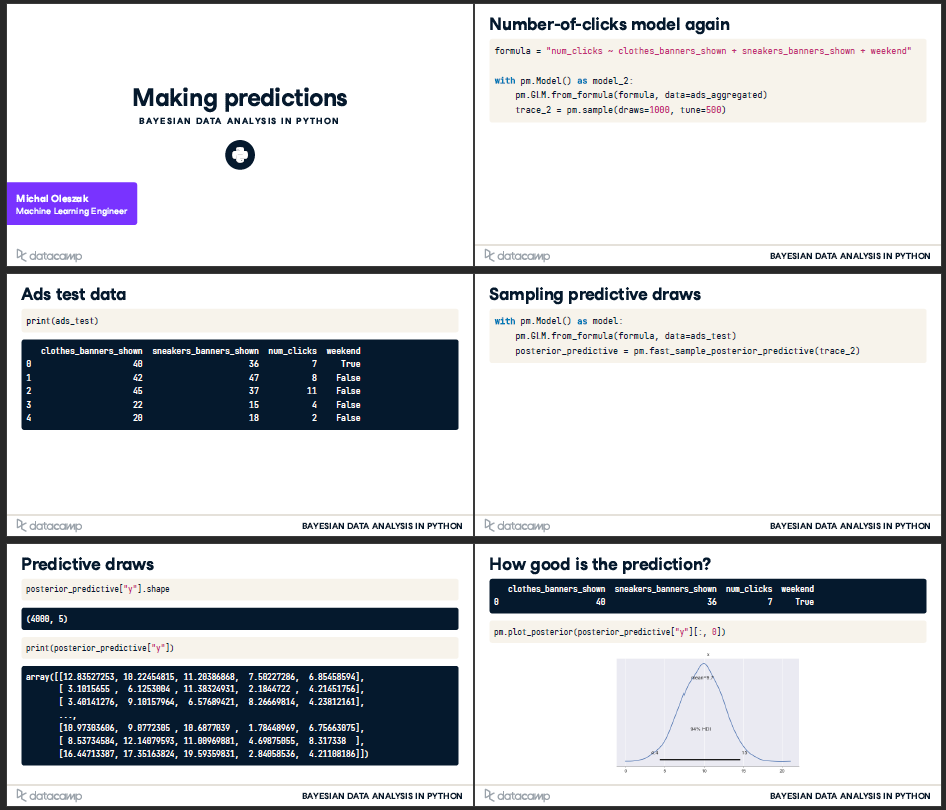
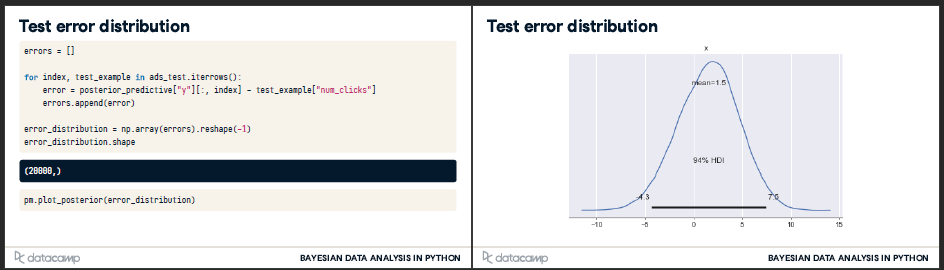

1. Making predictions
Welcome back! Having inspected the posterior draws and verified the model was fitted successfully, we can use the model to make predictions for new data!

2. Number-of-clicks model again
Let's take a look at our number-of-clicks model once again as a reminder.

3. Ads test data
Now we have some new data in a variable named ads_test: five new observations which were not in the data we used to fit the model. For each of these new observations, we know the true number of clicks, so we can compare it with the model's predictions to see how accurate they are.

4. Sampling predictive draws
To obtain predictions for the new data, we start with a with statement calling pm.model, just like we did when generating the trace. Next, inside the with statement, we call pm.glm.from_formula just as before. We pass the same model formula, but this time, we pass the new test data to the data argument. Finally, we call pm.fast_sample_posterior_predictive on the trace generated by our model. Now, the posterior_predictive variable holds the predictive distributions for our test data. Let's take a look inside!

5. Predictive draws
pymc3 denotes the response variable in a regression model with "y", so we need to extract it from posterior_predictive. Printing its shape and contents, we see that it's a numpy array of 4000 rows and five columns. The five columns correspond to the five observations in our test data for which the predictions have been generated. In each column, that is: for each test observation, there are 4000 predictive draws, which corresponds to the settings we chose when fitting the model: 1000 draws and 4 chains.

6. How good is the prediction?
Let's evaluate these predictions! This is our first test observation with the number of clicks equal to seven. And this is our corresponding prediction: we take the "y" from posterior_predictive, and slice it to get only the first column, corresponding to the first test observation. Let's pass it to plot_posterior. The posterior mean amounts to 9.7 and we are 94% sure its between 4.4 and 15. Not that bad, is it? This is the prediction for just a single test observation. It would be much more useful to estimate the model's error in general, based on many test examples. Let's see how to do this!

7. Test error distribution
We start be creating an empty list called errors to store the errors for subsequent test observations. Then, we iterate over the rows of ads_test using the iterrows method. Here, test_example is the row of the DataFrame, and the index is its index, from zero to four. For each row, we calculate the error as follows: we slice posterior_predictive just like before to take only the column corresponding to the index, and we subtract the true number of clicks from it. The first part is an array of 4000 predictive draws, and from each draw we subtract the true value to get the error distribution. Next, we append this error distribution to our list of errors. Now, errors is a list containing five arrays of 4000 values each. To get a general error distribution, we have to gather all these numbers into a single array. We can do so by passing errors to np-dot-array and reshaping it using the reshape method with -1 as the argument. This way, we get an array of shape 20000, which we can pass to pm-dot-plot_posterior.

8. Test error distribution
On average, our predictions are off by one point five clicks and we are more likely to predict too many than too few.

9. Let's make predictions!
Let's make predictions!

Sample from predictive density

Finally! Your job is to predict the number of bikes rented per day, and you are almost there. You have fitted the model and verified the quality of parameter draws. You have also chosen the better of the two competing models based on the WAIC. Now, it's time to use your best model to make predictions!

A couple of new observations, not seen by the model, have been collected in a DataFrame named bikes_test. For each of them, we know the true number of bikes rented, which will allow us to evaluate model performance. In this exercise, you will get familiar with the test data and generate predictive draws for every test observation. The trace of your model which you have generated before is available as trace_2, and pymc3 has been imported as pm. Let's make predictions!

In [ ]:
# Print bikes_test head
print(bikes_test.head())

# Define the formula
formula = "num_bikes ~ temp + work_day + wind_speed"

# Generate predictive draws
with pm.Model() as model:
    pm.GLM.from_formula(formula, data=bikes_test)
    posterior_predictive = pm.fast_sample_posterior_predictive(trace_2)

Estimating test error

Now that you have your posterior_predictive (available to you in your workspace), you can evaluate model performance on new data. To do this, you will need to loop over the test observations, and for each of them, compute the prediction error as the difference between the predictive distribution for this observation and the actual, true value. This will give you the distribution of your model's error, which you can then visualize.

You will need pymc3 and numpy, which have been imported for you as pm and np, respectively. The test data, bikes_test, is also available in your workspace. Let's get to it!

In [ ]:
# Initialize errors
errors = []

# Iterate over rows of bikes_test to compute error per row
for index, test_example in bikes_test.iterrows():
    error = posterior_predictive["y"][:, index] - test_example["num_bikes"]
    errors.append(error)

# Reshape errors by converting to np array and reshape
error_distribution = np.array(errors).reshape(-1)

# Plot the error distribution
pm.plot_posterior(error_distribution)
plt.show()

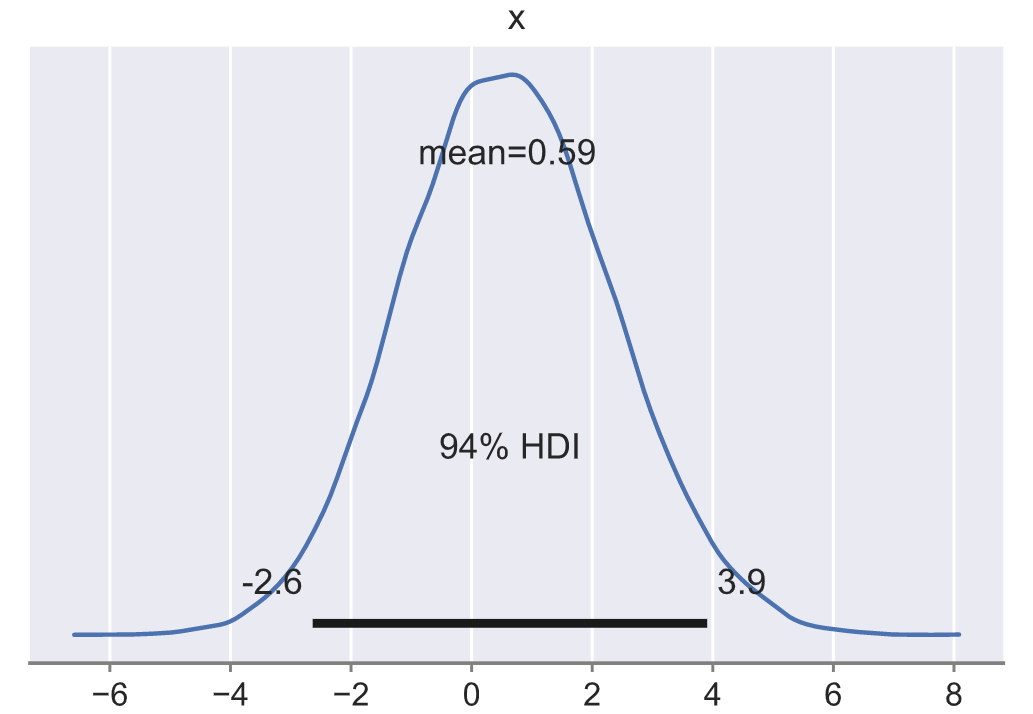

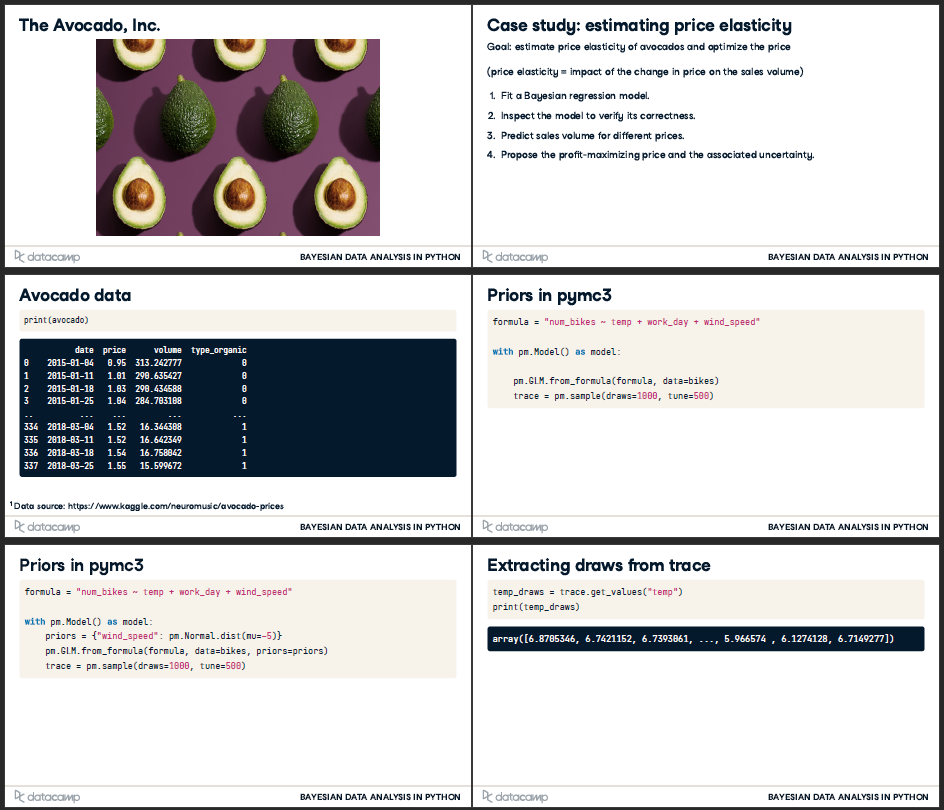
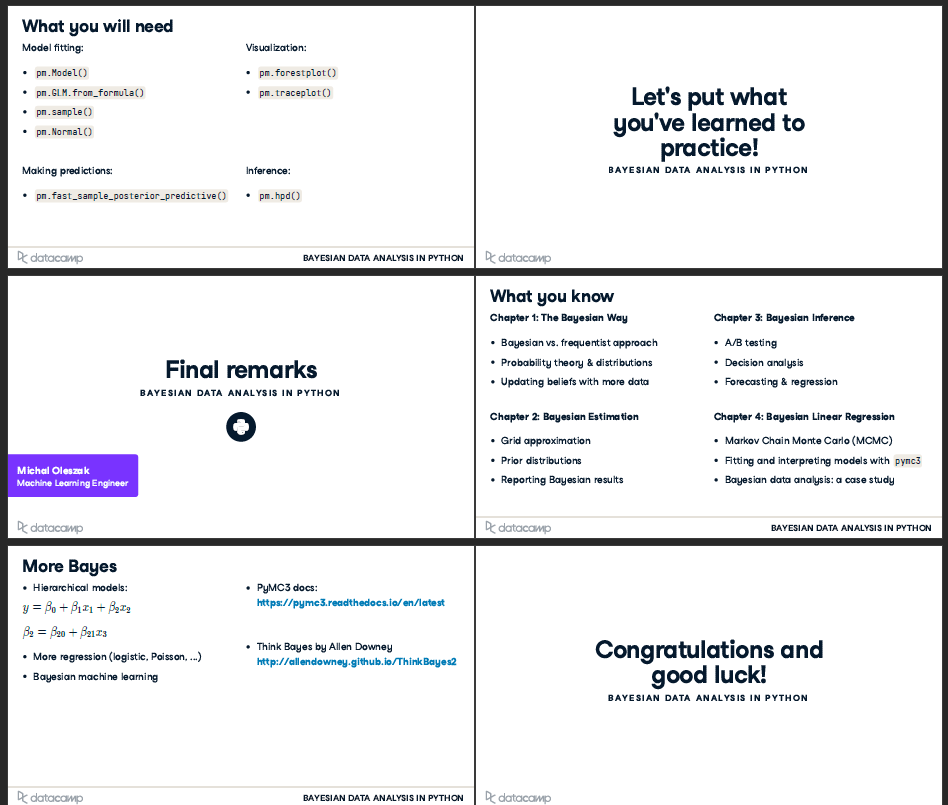

1. How much is an avocado?
Congratulations! You have reached the final lesson of the course, in which you will use what you have learned to solve a data analysis problem, the Bayesian way.

2. The Avocado, Inc.
You have just landed every millennial's dream job: a data analyst position at The Avocado Incorported, a company selling, yes, you guessed that right, avocados.

3. Case study: estimating price elasticity
These final few exercises will take the form of a case study, in which you will help your new company make their pricing decisions more data-driven. Your job will be to estimate the price elasticity for avocados and based on the outcome, propose the optimal price. Price elasticity is the impact of a price change on the sales volume. It can be estimated with a linear regression model, and this will be your starting point. Next, you will verify the model's correctness, and use it to predict sales volumes for different prices. Finally, you will propose the profit-maximizing price and the associated uncertainty.

4. Avocado data
The company has prepared some data for you. It includes the avocado price per piece, the volume sold for this price (in tens of thousands), and an indicator for whether the particular fruit was organic.

1 Data source: https://www.kaggle.com/neuromusic/avocado-prices
5. Priors in pymc3
Before you set off, let's discuss one thing that we didn't look at before: specifying priors in pymc3 models. Here's how we have fitted the number-of-bikes model before. We've said that since the priors are not specified, the model will just use the pretty good defaults. But it is, of course, possible to select our own priors. Say we expect the effect of wind speed to be negative and we would like to have a normal distribution with a mean of -5 as a prior for this variable.

6. Priors in pymc3
All we have to do is to create a dictionary, let's call it priors, with the variable name as key, and the desired prior distribution as value. Here, we use pm-normal-dist, with the mu parameter, that is the mean, set to -5. Then, we simply pass this dictionary to the priors argument in from_formula.

7. Extracting draws from trace
And the last thing before you go. How to extract the posterior draws for a particular parameter from the trace? We just call the get_values method on trace with the variable name passed as the argument. This results in a numpy array with posterior draws for this variable, from all chains combined.

8. What you will need
Now you are ready to face the avocado quest! Here is the list of the functions you will need to use. You have already seen all of them.

9. Let's put what you've learned to practice!
Let's put what you've learned to practice!

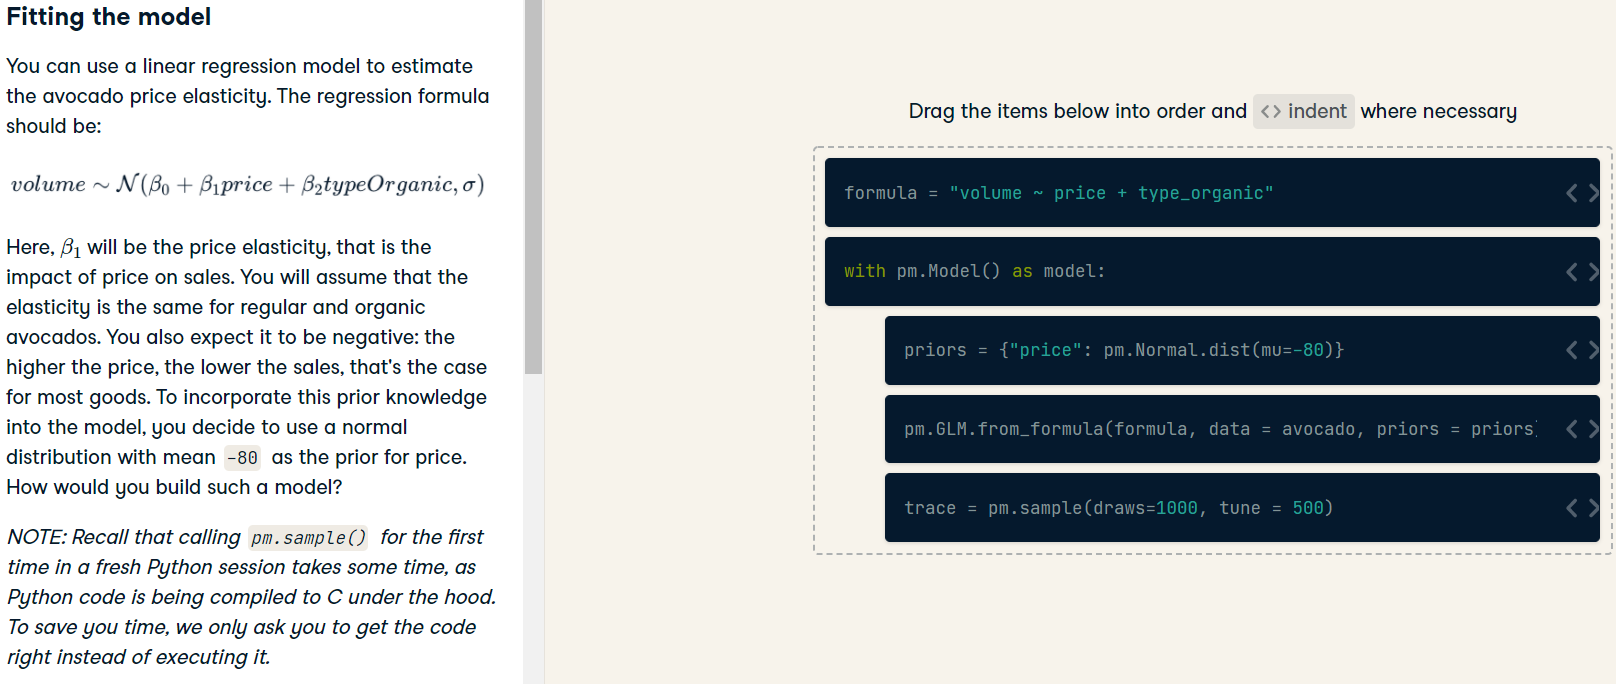


In [ ]:
# Draw a trace plot of trace
pm.traceplot(trace)
plt.show()

# Print a summary of trace
summary = pm.summary(trace)
print(summary)

# Get each parameter's posterior mean
intercept_mean = np.mean(trace.get_values("Intercept")) 
organic_mean = np.mean(trace.get_values("type_organic")) 
price_mean = np.mean(trace.get_values("price")) 
sd_mean = np.mean(trace.get_values("sd")) 

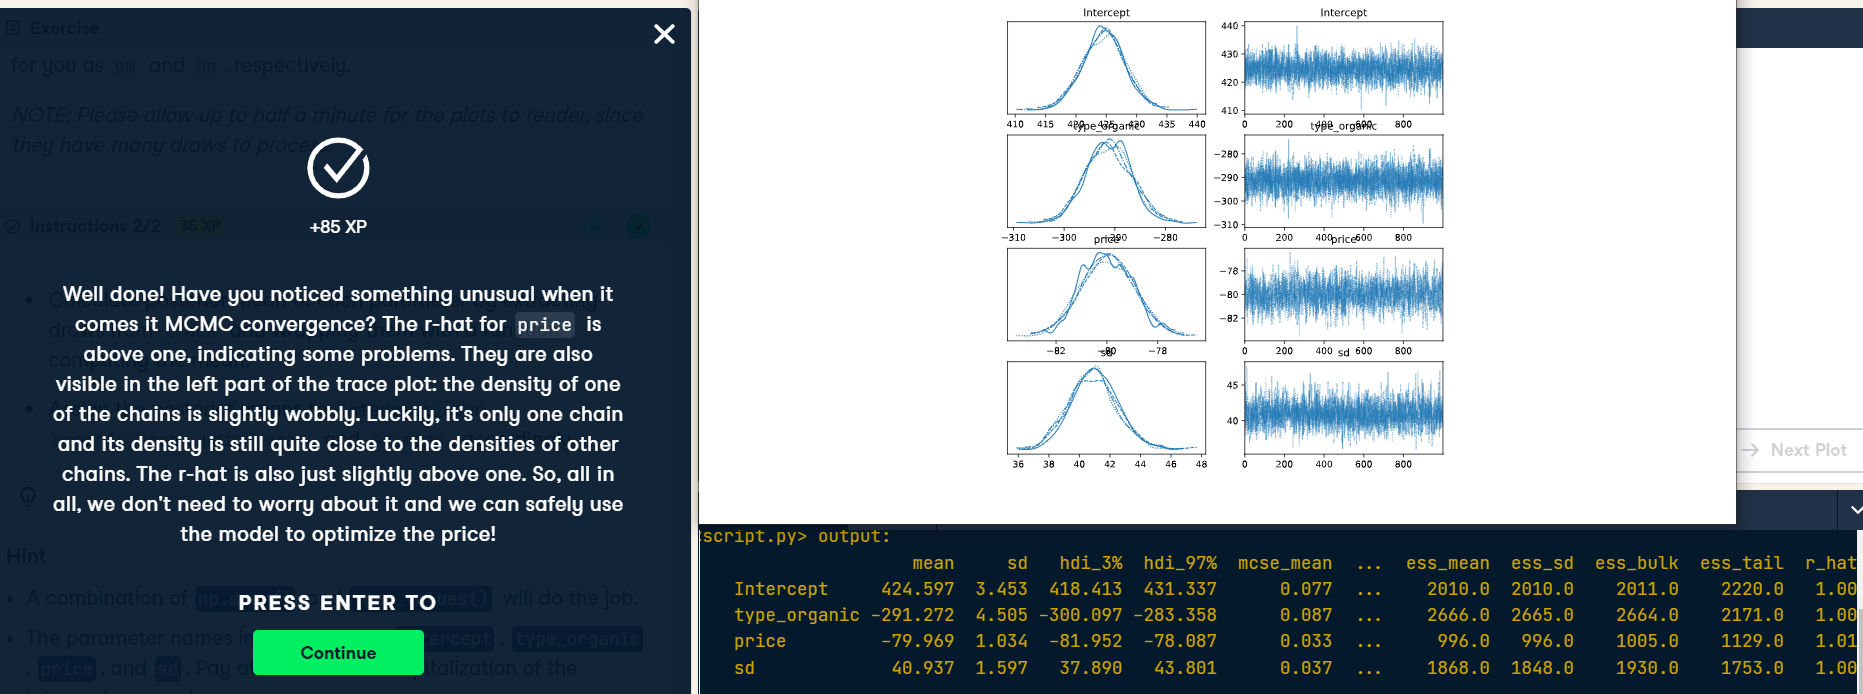

In [ ]:
# For each price, predict volume and use it to predict profit
predicted_profit_per_price = {}
for price in [0.5, 0.75, 1, 1.25]:
    pred_mean = (intercept_mean + price_mean * price + organic_mean)
    volume_pred = np.random.normal(pred_mean, sd_mean, size=1000)
    profit_pred = price * volume_pred
    predicted_profit_per_price.update({price: profit_pred})

In [ ]:
# For each price, predict volume and use it to predict profit
predicted_profit_per_price = {}
for price in [0.5, 0.75, 1, 1.25]:
    pred_mean = (intercept_mean + price_mean * price + organic_mean)
    volume_pred = np.random.normal(pred_mean, sd_mean, size=1000)
    profit_pred = price * volume_pred
    predicted_profit_per_price.update({price: profit_pred})
    
# Draw a forest plot of predicted profit for all prices
pm.forestplot(predicted_profit_per_price)
plt.show()

# Calculate and print HPD of predicted profit for the optimal price
opt_hpd = pm.hpd(predicted_profit_per_price[0.75], credible_interval=0.99)
print(opt_hpd)

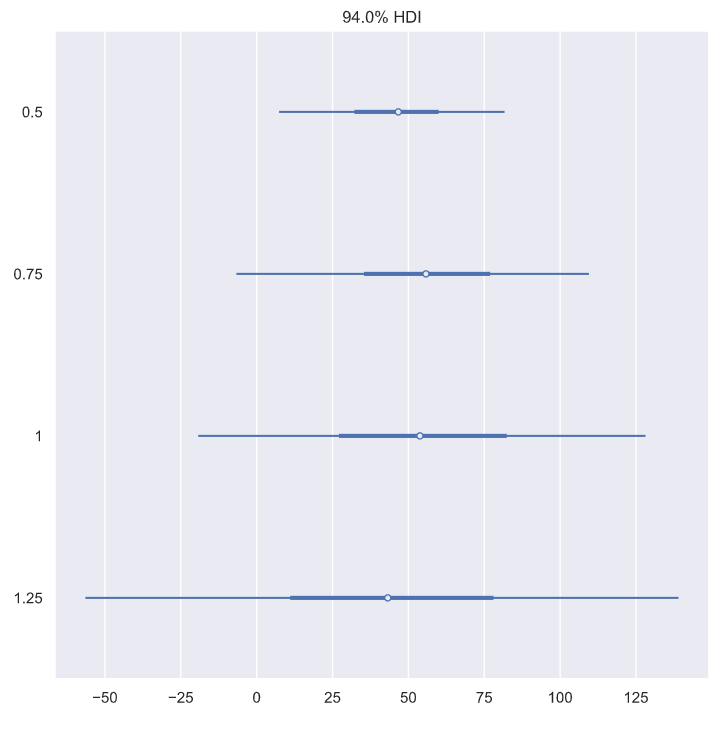


Got It!
1. Final remarks
Congratulations on completing the course! Let's do a quick recap!

2. What you know
In Chapter 1, you learned about the difference between Bayesian and frequentist approaches. You also learned about probability theory, probability distributions, and how a Bayesian model updates its beliefs. In Chapter 2, you learned about grid approximation, prior distributions, and how to effectively report Bayesian results. In Chapter 3, you were introduced to A/B testing, applying Bayesian analysis to decision-making, and regression and forecasting. Finally, in Chapter 4, you learned how MCMC methods work, used the pymc3 package to fit and interpret regression models, and concluded with a case study.

3. More Bayes
But the journey doesn't end here! The Bayesian framework allows us to combine multiple regression equations into what's called hierarchical models. There are also Bayesian versions of virtually all common statistical models, such as logistic or Poisson regression. Next, many popular machine learning techniques rely on Bayesian inference. There are even Bayesian neural networks! For further information, I encourage you to check out the pymc3 documentation and Allen Downey's Think Bayes, which is a great introductory read. It is available for free on the author's website.

4. Congratulations and good luck!
Once again, congratulations! I hope the knowledge and skills you've gained will help you generate insights from your data!